# Computational Linear Algebra: PCA Homework

## Initialization:
Fill the missing values in this text box and in the following code-cell.

**Academic Year:** 2024/2025

### Team Members (Alphabetical Order):
1. Fazlollahnezhad, Kamyar (s341418);
2. Shivaei, Shahrzad (s343616).

In [ ]:
StudentID1 = 341418  # <-------- Fill in the missing value
StudentID2 = 343616  # <-------- Fill in the missing value

## Starting Code-Cell
### Attention: DO NOT CHANGE THE CODE INSIDE THE FOLLOWING CELL!

In [ ]:
####################################################################
############## DO NOT CHANGE THE CODE IN THIS CELL #################
####################################################################

import numpy as np

var_entertainment_feat_types = ['Interests', 'Movies', 'Music']
var_personal_feat_types = ['Finance', 'Phobias']
fixed_feat_types = ['Personality', 'Health']

label_types = ['Demographic']

variables_by_type = {
    'Demographics': ['Age', 'Height', 'Weight', 'Number of siblings',
                     'Gender', 'Hand', 'Education', 'Only child', 'Home Town Type',
                     'Home Type'],
    'Finance': ['Finances', 'Shopping centres', 'Branded clothing',
                'Entertainment spending', 'Spending on looks',
                'Spending on gadgets', 'Spending on healthy eating'],
    'Health': ['Smoking', 'Alcohol', 'Healthy eating'],
    'Interests': ['History', 'Psychology', 'Politics', 'Mathematics',
                  'Physics', 'Internet', 'PC', 'Economy Management',
                  'Biology', 'Chemistry', 'Reading', 'Geography',
                  'Foreign languages', 'Medicine', 'Law', 'Cars',
                  'Art exhibitions', 'Religion', 'Countryside, outdoors',
                  'Dancing', 'Musical instruments', 'Writing', 'Passive sport',
                  'Active sport', 'Gardening', 'Celebrities', 'Shopping',
                  'Science and technology', 'Theatre', 'Fun with friends',
                  'Adrenaline sports', 'Pets'],
    'Movies': ['Movies', 'Horror', 'Thriller', 'Comedy', 'Romantic',
               'Sci-fi', 'War', 'Fantasy/Fairy tales', 'Animated',
               'Documentary', 'Western', 'Action'],
    'Music': ['Music', 'Slow songs or fast songs', 'Dance', 'Folk',
              'Country', 'Classical music', 'Musical', 'Pop', 'Rock',
              'Metal or Hardrock', 'Punk', 'Hiphop, Rap', 'Reggae, Ska',
              'Swing, Jazz', 'Rock n roll', 'Alternative', 'Latino',
              'Techno, Trance', 'Opera'],
    'Personality': ['Daily events', 'Prioritising workload',
                    'Writing notes', 'Workaholism', 'Thinking ahead',
                    'Final judgement', 'Reliability', 'Keeping promises',
                    'Loss of interest', 'Friends versus money', 'Funniness',
                    'Fake', 'Criminal damage', 'Decision making', 'Elections',
                    'Self-criticism', 'Judgment calls', 'Hypochondria',
                    'Empathy', 'Eating to survive', 'Giving',
                    'Compassion to animals', 'Borrowed stuff',
                    'Loneliness', 'Cheating in school', 'Health',
                    'Changing the past', 'God', 'Dreams', 'Charity',
                    'Number of friends', 'Punctuality', 'Lying', 'Waiting',
                    'New environment', 'Mood swings', 'Appearence and gestures',
                    'Socializing', 'Achievements', 'Responding to a serious letter',
                    'Children', 'Assertiveness', 'Getting angry',
                    'Knowing the right people', 'Public speaking',
                    'Unpopularity', 'Life struggles', 'Happiness in life',
                    'Energy levels', 'Small - big dogs', 'Personality',
                    'Finding lost valuables', 'Getting up', 'Interests or hobbies',
                    "Parents' advice", 'Questionnaires or polls', 'Internet usage'],
    'Phobias': ['Flying', 'Storm', 'Darkness', 'Heights', 'Spiders', 'Snakes',
                'Rats', 'Ageing', 'Dangerous dogs', 'Fear of public speaking']
}

labels = variables_by_type['Demographics']


try:
    random_seed = min([StudentID1, StudentID2])
except NameError:
    random_seed = StudentID1

def which_featgroups():
    np.random.seed(random_seed)
    these_entertainments = np.random.choice(var_entertainment_feat_types, 2, replace=False).tolist()
    these_personal = np.random.choice(var_personal_feat_types, 1, replace=False).tolist()
    these_types = fixed_feat_types + these_personal + these_entertainments
    print('*** THESE ARE THE SELECTED TYPE OF VARIABLES:')
    for k in these_types:
        print(f'{k}')
    print('*************************************')
    return these_types

def which_features(these_types):
    np.random.seed(random_seed)
    these_features = []
    for type in these_types:
        if type != 'Personality':
            these_features += variables_by_type[type]
        else:
            these_features += np.random.choice(variables_by_type[type],
                                               int(2 * (len(variables_by_type[type]) / 3)),
                                               replace=False).tolist()
    print('*** THESE ARE THE SELECTED FEATURES:')
    for ft in these_features:
        print(f'{ft}')
    print('*************************************')
    return these_features

these_types = which_featgroups()
these_features = which_features(these_types)

np.random.seed(random_seed)

*** THESE ARE THE SELECTED TYPE OF VARIABLES:
Personality
Health
Finance
Interests
Music
*************************************
*** THESE ARE THE SELECTED FEATURES:
Small - big dogs
Assertiveness
Changing the past
Unpopularity
Fake
Questionnaires or polls
Eating to survive
Socializing
Personality
Children
Appearence and gestures
New environment
Cheating in school
Lying
Health
Funniness
Hypochondria
Energy levels
Workaholism
Loss of interest
Writing notes
Final judgement
Knowing the right people
Reliability
Achievements
Borrowed stuff
Internet usage
Daily events
Loneliness
Giving
Getting up
Prioritising workload
Criminal damage
Waiting
Getting angry
Dreams
Number of friends
Parents' advice
Smoking
Alcohol
Healthy eating
Finances
Shopping centres
Branded clothing
Entertainment spending
Spending on looks
Spending on gadgets
Spending on healthy eating
History
Psychology
Politics
Mathematics
Physics
Internet
PC
Economy Management
Biology
Chemistry
Reading
Geography
Foreign languages
Medicine

## Importing Modules

In the following cell, import all the modules you think are necessary for doing the homework, **among the ones listed and used during the laboratories of the course**.
No extra modules are allowed for reproducibility.

In [ ]:
# DO NOT IMPORT NUMPY
# import ...
# Importing the required libraries

import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib
from matplotlib import cm
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
!ls

columns_hw.csv	responses_hw.csv  sample_data


## Exercise 1. Preparing the Dataset

In the cells below, do the following operations:
1. load the dataset "_responses_hw.csv_";
2. create a working dataframe extracting from _responses_hw.csv_ the columns corresponding to the variables in _these_features_, and randomly selecting 2/3 of the rows. Let us call this dataframe _X_df_;
3. analyze the obtained dataframe and performing cleansing/encoding operations.

### Explaining the code for Excercise 1:

In the following cell, we load a dataset from a specified CSV file into a pandas DataFrame and then selecting specific features (columns) defined in these_features from the responses_hw DataFrame and randomly samples approximately two-thirds of the data. The random_seed parameter ensures that the randomness is reproducible. In the 9th line,we want to khow the number of entries, data types and non-null entries and then we print the missing values in each column of Xdf_ dataframe in line NO.14. The next step is to replace the respective mean values instead of missing values in numerical columns and replacing the mode value in each column in categorical columns. At line 27,we use one hot encoding for categorical variables which helps to facilitate analysis by turning categories into binary indicators. At the end, displays the first few rows of the cleaned DataFrame.

In [ ]:
#Load the dataset
responses_hw = pd.read_csv('responses_hw.csv')
columns_hw = pd.read_csv('columns_hw.csv')


#Pick out the features we care about and grab a random 2/3 of the data
Xdf_ = responses_hw[these_features].sample(frac=2/3, random_state=random_seed)

#Take a closer look at the data and clean it up
# Get a quick overview of what the data looks like
print("Dataframe Overview:")
print(Xdf_.info())

# Check if there are any missing values
print("\nMissing Values:")
print(Xdf_.isnull().sum())

# Fill in missing values for numerical columns with the average
numerical_cols = Xdf_.select_dtypes(include=np.number).columns
for col in numerical_cols:
    Xdf_[col].fillna(Xdf_[col].mean(), inplace=True)

# Fill in missing values for text-based columns with the most common value
categorical_cols = Xdf_.select_dtypes(exclude=np.number).columns
for col in categorical_cols:
    Xdf_[col].fillna(Xdf_[col].mode()[0], inplace=True)

# Turn text-based columns into numbers (e.g., one-hot encoding)
Xdf_ = pd.get_dummies(Xdf_, columns=categorical_cols, drop_first=True)

# Step 4: Double-check the cleaned data
print("\nCleaned Dataframe Overview:")
print(Xdf_.info())

# Show a small sample of the cleaned-up data
print("\nSample of Cleaned Data:")
print(Xdf_.head())


Dataframe Overview:
<class 'pandas.core.frame.DataFrame'>
Index: 673 entries, 404 to 86
Data columns (total 99 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Small - big dogs            669 non-null    float64
 1   Assertiveness               672 non-null    float64
 2   Changing the past           672 non-null    float64
 3   Unpopularity                671 non-null    float64
 4   Fake                        672 non-null    float64
 5   Questionnaires or polls     670 non-null    float64
 6   Eating to survive           673 non-null    int64  
 7   Socializing                 669 non-null    float64
 8   Personality                 671 non-null    float64
 9   Children                    669 non-null    float64
 10  Appearence and gestures     671 non-null    float64
 11  New environment             671 non-null    float64
 12  Cheating in school          671 non-null    float64
 13  Lying              

<ipython-input-59-48765df7809e>:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Xdf_[col].fillna(Xdf_[col].mean(), inplace=True)
<ipython-input-59-48765df7809e>:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

## Exercise 2. Analyzing the Variance and the PCs

In the cells below, do the following operations:
1. create two new dataframes from _X_df_ applying a StandardScaler and a MinMaxscaler. Call these new dataframes as _Xstd_df_ and _Xmm_df_, respectively;
2. compute the variance of all the features in _X_df_, _Xstd_df_, and _Xmm_df_ and **comment the results**;
3. compute all the $n$ Principal Components (PCs) for each dataset _X_df_, _Xstd_df_, and _Xmm_df_. Then, visualize the curves of the cumulative explained variances and **comment the results**.

### Explaining the code for Excercise 2:

we apply StandardScaler, which standardizes features by removing the mean and scaling to unit variance (z-score normalization). After this transformation, every feature will have a mean of 0 and a standard deviation of 1, resulting in a DataFrame called Xstd_df. Then we use MinMaxScaler, which scales features to a fixed range, typically [0, 1]. The next step is to compute and print the variance of each feature for the three DataFrames: original (Xdf_), standardized (Xstd_df), and min-max scaled (Xmm_df). The variance of the features in Xstd_df should all equal 1 due to the standardization process.
In the original DataFrame (Xdf_), variances will vary based on the original data’s distribution, while in the min-max scaled DataFrame (Xmm_df), variances can be different and typically not equal to 1 because they retain the scale of the original data's distribution. At line 21, This function utilizes PCA to analyze the given DataFrame. It fits the PCA model, computes the explained variance ratio (the percentage of variance captured by each principal component), and calculates cumulative variance. Actualy,it plots the cumulative explained variance against the number of principal components, providing a visual presentation of how many components are needed to capture most of the variance in the data. Then we analyze how variance is explained through components in different scaling methods. At the end, the elbow point (where the curve starts to flatten) helps inform decisions on how many principal components to keep for tasks such as data visualization.

Variance of original features:
Small - big dogs          1.497869
Assertiveness             1.166631
Changing the past         1.651358
Unpopularity              1.211851
Fake                      1.146841
                            ...   
Smoking_former smoker     0.149583
Smoking_never smoked      0.159702
Smoking_tried smoking     0.244733
Alcohol_never             0.099169
Alcohol_social drinker    0.223860
Length: 106, dtype: float64

Variance of standardized features:
Small - big dogs          1.001488
Assertiveness             1.001488
Changing the past         1.001488
Unpopularity              1.001488
Fake                      1.001488
                            ...   
Smoking_former smoker     1.001488
Smoking_never smoked      1.001488
Smoking_tried smoking     1.001488
Alcohol_never             1.001488
Alcohol_social drinker    1.001488
Length: 106, dtype: float64

Variance of min-max scaled features:
Small - big dogs          0.093617
Assertiveness             0.072914

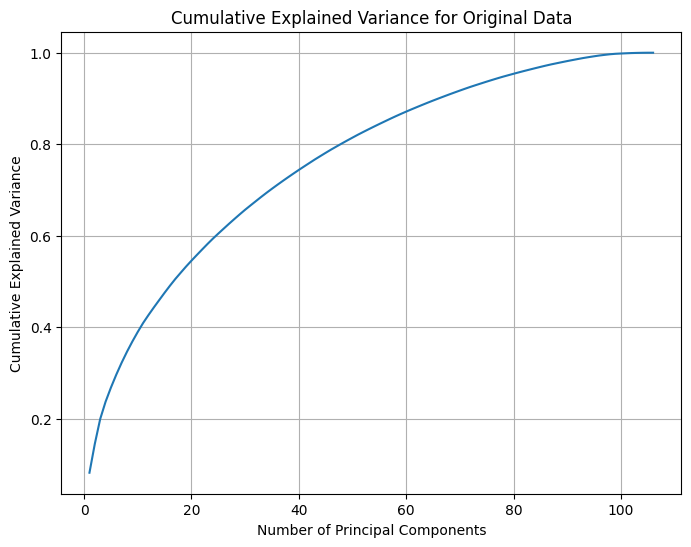

Explained variance ratio for Original Data:
[8.15435917e-02 6.32729762e-02 5.41973199e-02 3.76884215e-02
 3.10506411e-02 2.83619891e-02 2.61200442e-02 2.41202492e-02
 2.23068283e-02 2.08673220e-02 1.95162996e-02 1.74013044e-02
 1.66517352e-02 1.60753888e-02 1.59762943e-02 1.54147142e-02
 1.47284767e-02 1.36687689e-02 1.34923138e-02 1.27870895e-02
 1.23881730e-02 1.22135806e-02 1.20330709e-02 1.16167753e-02
 1.10027577e-02 1.07599578e-02 1.06926707e-02 1.04276129e-02
 1.02411920e-02 9.98993708e-03 9.46969956e-03 9.35563608e-03
 9.32489041e-03 9.04519209e-03 8.74244626e-03 8.55290604e-03
 8.37150561e-03 8.21029924e-03 8.05818990e-03 7.92983395e-03
 7.74450149e-03 7.63443897e-03 7.59801115e-03 7.23637750e-03
 7.18196332e-03 7.04192183e-03 6.70704380e-03 6.62979106e-03
 6.51896490e-03 6.36885540e-03 6.31800177e-03 6.02481006e-03
 5.92474694e-03 5.81407337e-03 5.72092068e-03 5.62117531e-03
 5.59587936e-03 5.44621028e-03 5.28834241e-03 5.13289261e-03
 5.00701522e-03 4.87016182e-03 4.83404889

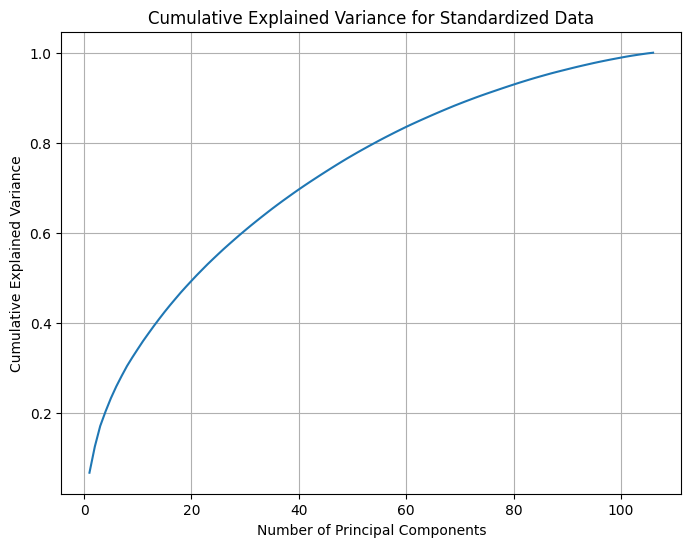

Explained variance ratio for Standardized Data:
[0.06713176 0.05803511 0.04559771 0.03252046 0.02953135 0.02604741
 0.02326265 0.02211155 0.01927748 0.01833732 0.01803862 0.01675445
 0.01648096 0.01583712 0.01539376 0.01474671 0.01413387 0.01402037
 0.01319667 0.0128545  0.01267562 0.01213314 0.01203807 0.01144868
 0.01126626 0.01109501 0.01065415 0.01047965 0.01038637 0.0100435
 0.00992681 0.00963769 0.00952336 0.00932645 0.00925245 0.00895263
 0.00877629 0.00855635 0.00852339 0.00834878 0.00814804 0.00797043
 0.00780742 0.00775999 0.0076381  0.00755414 0.00743572 0.00733931
 0.00717938 0.00693645 0.00687959 0.00667941 0.00657682 0.00647913
 0.00643629 0.00624878 0.00609097 0.00605947 0.00588641 0.00584008
 0.00559682 0.00545317 0.00538817 0.00527857 0.00524515 0.00513106
 0.00506026 0.00498933 0.00493123 0.00467842 0.00462387 0.00450166
 0.00446157 0.00431206 0.00417819 0.00409748 0.00406536 0.00405627
 0.00398328 0.00392035 0.00384575 0.00372442 0.00365531 0.003564
 0.00341257 0.003

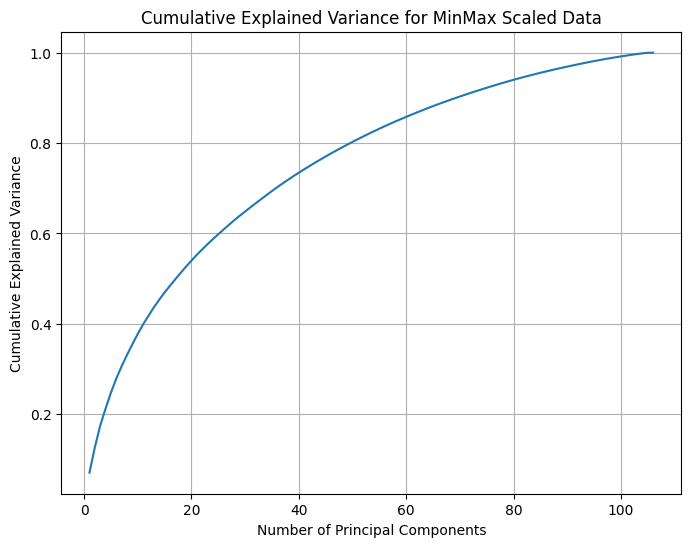

Explained variance ratio for MinMax Scaled Data:
[0.07064064 0.05603598 0.04807557 0.03772391 0.03532611 0.03133
 0.0274142  0.02491402 0.02353093 0.02285817 0.02119434 0.01894602
 0.01871711 0.01675624 0.0160876  0.01486188 0.01440801 0.01420593
 0.01380317 0.01309075 0.01295011 0.01182335 0.01166826 0.01121749
 0.01076712 0.01062343 0.01034221 0.01017586 0.0098146  0.00937458
 0.00930144 0.00917109 0.00904594 0.00895681 0.00883681 0.00857127
 0.00832958 0.00800409 0.00793124 0.00768761 0.00750101 0.00732609
 0.007212   0.00698652 0.00688204 0.00671224 0.00659675 0.00639123
 0.00636966 0.00614819 0.00607243 0.00605253 0.00583161 0.00565596
 0.00556472 0.00552918 0.00540061 0.00527784 0.00502397 0.00498862
 0.00495312 0.0048642  0.00474886 0.00466437 0.00455343 0.00445058
 0.00428892 0.00423164 0.0042118  0.00410301 0.00406718 0.00389986
 0.00385877 0.00378859 0.00372202 0.0036742  0.00356713 0.00354242
 0.00340964 0.0033391  0.00332869 0.00318545 0.00309203 0.00302652
 0.00297161 0.00

In [ ]:
# Create Xstd_df using StandardScaler
scaler = StandardScaler()
Xstd_df = pd.DataFrame(scaler.fit_transform(Xdf_), columns=Xdf_.columns)

# Create Xmm_df using MinMaxScaler
scaler = MinMaxScaler()
Xmm_df = pd.DataFrame(scaler.fit_transform(Xdf_), columns=Xdf_.columns)

# Compute and print variances
print("Variance of original features:")
print(Xdf_.var())
print("\nVariance of standardized features:")
print(Xstd_df.var())
print("\nVariance of min-max scaled features:")
print(Xmm_df.var())





def analyze_pca(df, title):
    pca = PCA()
    pca.fit(df)
    explained_variance_ratio = pca.explained_variance_ratio_
    cumulative_variance = np.cumsum(explained_variance_ratio)

    plt.figure(figsize=(8, 6))
    plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance)
    plt.xlabel('Number of Principal Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.title(f'Cumulative Explained Variance for {title}')
    plt.grid(True)
    plt.show()

    print(f"Explained variance ratio for {title}:\n{explained_variance_ratio}")
    print(f"Cumulative variance for {title}:\n{cumulative_variance}")

# Analyze PCA for each dataframe
analyze_pca(Xdf_, "Original Data")
analyze_pca(Xstd_df, "Standardized Data")
analyze_pca(Xmm_df, "MinMax Scaled Data")


**Comparing the variance of all features**:

**Original Data:**

The cumulative variance increases gradually and approaches 100% as the number of components approaches the total number of features.
The growth is slower in the early components, indicating that the data is not well-scaled, and variance is distributed unevenly across features.

Without scaling, the features with larger variances dominate the PCA process, leading to a slower accumulation of variance in the early components.
This can bias the PCA results towards features with higher magnitudes, potentially neglecting meaningful patterns in features with smaller variances.

 **Standardized Data**

The cumulative variance increases more uniformly compared to the original data, showing that PCA captures variance evenly across the components.
Standardization centers the data (mean = 0) and scales each feature to unit variance (
𝜎
=
1
σ=1), ensuring no single feature dominates the PCA process.

This is typically the best preprocessing method for PCA, as it allows all features to contribute equally to the variance, improving interpretability and performance.
The components show a smoother accumulation of variance compared to the unscaled data.

**MinMax Scaled Data**

Similar to the standardized data, the cumulative explained variance increases steadily, but the scaling here adjusts the data to the range
[0,1] instead of standardizing to mean = 0 and variance = 1.
The variance distribution among components is more uniform compared to the original data but less so than standardized data.

MinMax scaling is useful when feature magnitudes vary widely, but it is less robust than standardization for PCA because it does not account for feature variance.

 Summary: Standardized data achieves a more balanced and interpretable PCA result.
MinMax scaling is acceptable but less robust.
Original data often skews PCA results due to uneven variance distribution.

Variance in the original data:
Small - big dogs          1.497869
Assertiveness             1.166631
Changing the past         1.651358
Unpopularity              1.211851
Fake                      1.146841
                            ...   
Smoking_former smoker     0.149583
Smoking_never smoked      0.159702
Smoking_tried smoking     0.244733
Alcohol_never             0.099169
Alcohol_social drinker    0.223860
Length: 106, dtype: float64

Variance after standardization (all set to ~1):
Small - big dogs          1.001488
Assertiveness             1.001488
Changing the past         1.001488
Unpopularity              1.001488
Fake                      1.001488
                            ...   
Smoking_former smoker     1.001488
Smoking_never smoked      1.001488
Smoking_tried smoking     1.001488
Alcohol_never             1.001488
Alcohol_social drinker    1.001488
Length: 106, dtype: float64

Variance after MinMax scaling (depends on the original scale):
Small - big dogs          0.09

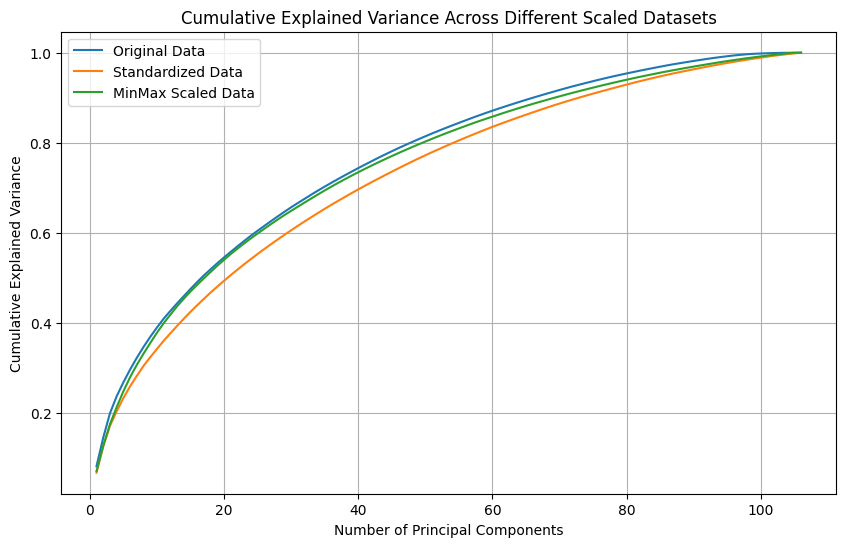

In [ ]:
# Scale the data using StandardScaler and MinMaxScaler
Xstd_df = pd.DataFrame(StandardScaler().fit_transform(Xdf_), columns=Xdf_.columns)
Xmm_df = pd.DataFrame(MinMaxScaler().fit_transform(Xdf_), columns=Xdf_.columns)

# Print out some general information about variances in the datasets
print("Variance in the original data:")
print(Xdf_.var())

print("\nVariance after standardization (all set to ~1):")
print(Xstd_df.var())

print("\nVariance after MinMax scaling (depends on the original scale):")
print(Xmm_df.var())

# Function to calculate cumulative explained variance for PCA
def get_cumulative_variance(df):
    pca = PCA()
    pca.fit(df)
    return np.cumsum(pca.explained_variance_ratio_)

# Calculate cumulative variance for all datasets
cumulative_var_original = get_cumulative_variance(Xdf_)
cumulative_var_standardized = get_cumulative_variance(Xstd_df)
cumulative_var_minmax = get_cumulative_variance(Xmm_df)

# Plot all cumulative explained variance results together
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_var_original) + 1), cumulative_var_original, label="Original Data")
plt.plot(range(1, len(cumulative_var_standardized) + 1), cumulative_var_standardized, label="Standardized Data")
plt.plot(range(1, len(cumulative_var_minmax) + 1), cumulative_var_minmax, label="MinMax Scaled Data")

plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance Across Different Scaled Datasets')
plt.legend()
plt.grid(True)
plt.show()

***Results:***

**Original Data:**

Variance values reflect the original scale of the features.
Features with large magnitudes dominate the PCA process.

**Standardized Data:**

Variance is set to ~1 for all features after scaling.
Ensures that PCA does not prioritize one feature over another due to variance differences.

**MinMax Scaled Data:**

Variance depends on the original feature scale but is adjusted to reflect the feature ranges.
Features with wide original ranges may still influence PCA more heavily.

**As a conclusion:**

Standardized Data Performs Best:

Produces a balanced cumulative variance curve, ensuring equal contribution from all features.
Results in a more robust PCA process and interpretable principal components.

MinMax Scaling is Acceptable:

Similar to standardized data but slightly influenced by original feature ranges.
Suitable when retaining relative scales between features is important.

Original Data is Less Reliable:

Skewed variance distribution makes it unsuitable for PCA unless all features have similar scales.
The disproportionate contribution from a subset of features may lead to biased results.

## Exercise 3. Dimensionality Reduction and PC Interpretation

In the cells below, do the following operations:
1. For each one of the two dataframes _Xstd_df_, and _Xmm_df_, compute a new PCA for performing a dimensionality reduction with respect to $m$ dimensions. The value of $m$ must be $$m = \min\{m', 5\}\,,$$ where $m'$ is the value required for obtaining $33\%$ of the total variance.
2. For both the cases, visualize all the PCs and give a name/interpretation to them. **Comment and motivate your interpretations**. If possible, **compare the differences among the results obtained** for _Xstd_df_ and _Xmm_df_.
3. Perform the score graph for both the cases (_std_ and _mm_). If $m>3$, plot the score graph with respect to the first 3 PCs. All the **plots must show the names of the PCs on the axes** for better understanding the results.
4. **Optional:** plot more score graphs, coloring the dots with respect to any label in the list _labels_ that you believe can be interesting. **Comment and analyze this optional plots**.

## Explaining the code for Exercise 3:  
In this section, we apply PCA (Principle Component Analysis) to find components which can describe our dataset with less dimension with as less variance as possible. This algorithm includes several steps that are explained below, however, we used pca function from "sklearn" library.  
### PCA Algorithm:
1. Normalize the Data (which is done above):  
$$x_{normalized}
=
\frac{x-μ}{𝜎}
$$
where 𝜇 is the mean and 𝜎 is the standard deviation.  
2. Compute the Covariance Matrix:
$$
Σ = \frac{1}{𝑛-1}𝑋^𝑇𝑋
$$
3. Calculate Eigenvalues and Eigenvectors: Eigenvectors define the directions of the new feature space.
Eigenvalues define the magnitude (variance) along those directions.
4. Sort Eigenvectors: Sort by eigenvalues in descending order.
Select the top 𝑘 (here $$min(5,𝑘_{33})$$ which $$𝑘_{33}$$ is the minimum number of the eigenvectors that reduce the variance more than than 33 percent)eigenvectors for dimensionality reduction.
  
Breifly speaking(for more details, the comments are expressive) in the code below, first, we calculated components of our dataset, then selected m number of them which, m is equal to the $k_{33}$ explained above.  
After selecting the m number of principle components, we visualize the results in 2 kind of graphs:  
1. First one is acolumn graph, showing the percentage of the variance that the component explains.  
2. Second a 2D or 3D (here both 3D) graphs that visualize the datapoints using 2 or 3 principle components.

Now according to the graphs above, we interpret and name the principle components. we must assume that PCA method is more interpretable than models like deep neural networks, but each component is not necesseraliy a intuitive feature that we can interpret. However we will try our best to undertand and interpret them.  
###For Xstd_df dataset:  
#### PC 1:  
Principle Component 1 , Positive features:  ['Art', 'Theatre', 'Classical', 'Opera', 'Poetry reading'].     
Principle Component 1 , Negative features:  ['I used to cheat at school.', 'Internet usage_most of the day', 'I damaged things in the past when angry.', 'I prefer.', 'I wish I could change the past because of the things I have done.'].   

From these features we can deduce that PC1 in Xstd_df mostly related to art and high culture (Almmost all of the features). On the oher hand, we see features which represent some kind of negative history and regret about past, which have negative impact.
#### PC2:  
Principle Component 2 , Positive features:  ['I spend a lot of money on my appearance.', 'Hip hop, Rap', 'I prefer branded clothing to non branded.', 'I have lots of friends.', 'I enjoy going to large shopping centres.'].   
Principle Component 2 , Negative features:  ['Smoking_never smoked', 'I feel lonely in life.', 'Poetry reading', 'Metal, Hard rock', 'I save all the money I can.'].   
Seems like this component represent being social and extrovert, also noticing appearence and fashion. However, being lonely, introvert, saving money instead of spending it a lot, has negative impact in this component.  I also noticed that on the positive side we have hip hop and pop generes which mostly are popular and colorful music, against metal and hard rock which have darker themes.    
#### PC3:   
Principle Component 3 , Positive features:  ['Shopping', 'Celebrity lifestyle', 'I enjoy going to large shopping centres.', 'Pop', 'Dancing'].   
Principle Component 3 , Negative features:  ['Physics', 'Science and technology', 'Metal, Hard rock', 'PC Software, Hardware', 'Punk']
This component shows having tendency to shopping and caring about pop culture(celebrities and Pop), also fun activities like dancing. On the other hand, negative features include more serious concepts such as Physics, Science and Tech, PC Hardware and Software.  
#### PC4:  
Principle Component 4 , Positive features:  ['Chemistry', 'Biology', 'I try to do tasks as soon as possible and not leave them until last minute.', 'Medicine', 'Smoking_never smoked']
Principle Component 4 , Negative features:  ['Alternative music', 'Foreign languages', 'Poetry reading', 'I spend a lot of money on  partying and socializing.', 'I can be two faced sometimes.']
Positive Side: Science-oriented, disciplined, and structured.
Negative Side: Interest in alternative music, foreign languages, poetry, and social spending. Scientific Discipline vs. Artistic & Free-Spirited

#### PC5:  
Principle Component 5 , Positive features:  ['I have lots of friends.', 'Socializing', 'I am always full of life and energy.', 'I can quickly adapt to a new environment.', 'I used to cheat at school.']
Principle Component 5 , Negative features:  ['PC Software, Hardware', 'Politics', 'I feel lonely in life.', 'I take notice of what goes on around me.', 'I can be two faced sometimes.']
This component emphasizes on (positive)being energetic and being social against (negative) being lonely and just being observer. Energetic & Socially Dynamic vs. Thoughtful & Observant.   
  
#### We name them based on their poositive side:
PC1: Cultural Sophistication.   
PC2: Materialism & Social.   
PC3: Pop Culture & Consumerism.     
PC4: Academic & Disciplined.   
PC5: Outgoing & Socially Adaptive.   


###For Xstd_mm dataset:  
#### PC1:    
Principle Component 1 , Positive features:  ['Poetry reading', 'Art', 'Theatre', 'Classical', 'Playing musical instruments'].   
Principle Component 1 , Negative features:  ['I used to cheat at school.', 'I damaged things in the past when angry.', 'Cars', 'Internet usage_most of the day', 'I prefer branded clothing to non branded.'].   
Positive Side: Interest in poetry, art, theatre, classical music, and playing musical instruments—indicating a refined, artistic, and intellectual personality.  
Negative Side: Past rule-breaking behavior, aggression, love for cars, excessive internet use, and preference for branded clothing—suggesting materialism and impulsivity.    

####PC2:
Principle Component 2 , Positive features:  ['Adrenaline sports', 'Hip hop, Rap', 'I spend a lot of money on my appearance.', 'I prefer branded clothing to non branded.', 'Sport at competitive level'].   
Principle Component 2 , Negative features:  ['Smoking_never smoked', 'Lying_sometimes', 'Metal, Hard rock', 'Poetry reading', 'I feel lonely in life.'].   
Positive Side: Interest in adrenaline sports, hip-hop/rap, spending money on appearance, brand-consciousness, and competitive sports—indicating a thrill-seeking and image-conscious personality.    
Negative Side: Avoids smoking, dislikes lying, enjoys metal/rock music and poetry, and experiences loneliness—suggesting a more introspective and non-materialistic nature.    

####PC3:
Principle Component 3 , Positive features:  ['Metal, Hard rock', 'PC Software, Hardware', 'Physics', 'Science and technology', 'Punk'].   
Principle Component 3 , Negative features:  ['Shopping', 'Alcohol_social drinker', 'Celebrity lifestyle', 'Dancing', 'I enjoy going to large shopping centres.'].   
Positive Side: Enjoys science, technology, physics, PC hardware, and alternative music genres like metal and punk—suggesting a technical, analytical, and countercultural mindset.    
Negative Side: Interested in shopping, social drinking, celebrity culture, dancing, and large shopping centers—indicating mainstream consumerist and social behaviors.  
####PC4:
Principle Component 4 , Positive features:  ['Lying_sometimes', 'Sport at competitive level', 'Biology', 'Chemistry', 'Medicine'].     
Principle Component 4 , Negative features:  ['Lying_only to avoid hurting someone', 'Smoking_tried smoking', 'Poetry reading', 'Celebrity lifestyle', 'I am a hypochondriac.'].   
Positive Side: Competitive in sports, interested in biology, chemistry, and medicine, and is comfortable with occasional lying—indicating a results-driven, pragmatic personality.  
Negative Side: Prefers honesty even if it hurts, has a history of smoking experimentation, enjoys poetry and celebrity culture, and is a hypochondriac—suggesting a more emotional, sensitive, and ethically driven personality.  
####PC5:
Principle Component 5 , Positive features:  ['Smoking_tried smoking', 'Lying_sometimes', 'Alternative music', 'Poetry reading', 'Foreign languages'].   
Principle Component 5 , Negative features:  ['Smoking_never smoked', 'Lying_only to avoid hurting someone', 'Chemistry', 'Biology', 'Medicine'].   
Positive Side: Alternative music, poetry, foreign languages, occasional lying, and history of smoking—suggesting a rebellious, artistic, and non-conventional personality.    
Negative Side: Never smoked, prefers honesty, and is interested in structured sciences like chemistry, biology, and medicine—indicating a disciplined, logical, and structured mindset.    

  
#### We name them based on their poositive side:
Finally we name these components based on their positive side(negative side is the opposite of this positive features).   

PC1: Artistic & Intellectual.     
PC2: Thrill-Seeking & Image-Focused.     
PC3: Analytical & Tech-Oriented.       
PC4: Competitive & Rational.     
PC5: Rebellious & Artistic.     


Principal Components for Xstd_df


<Figure size 1200x800 with 0 Axes>

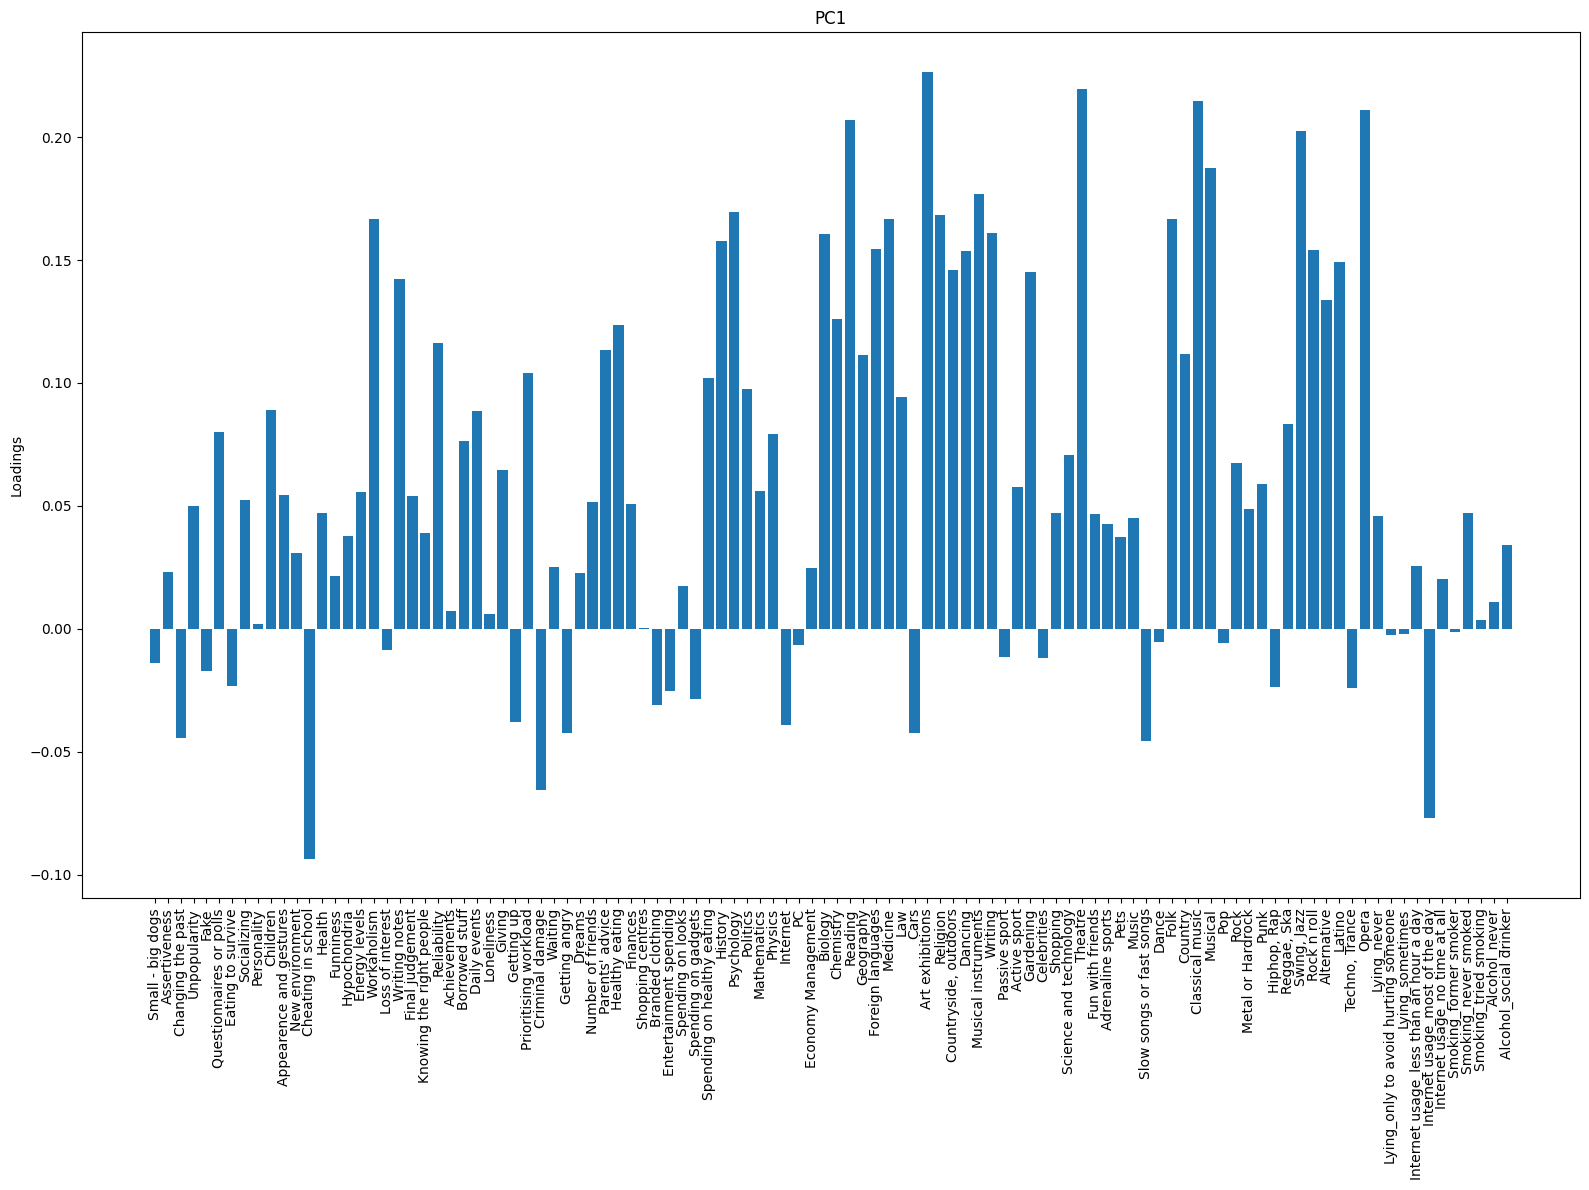

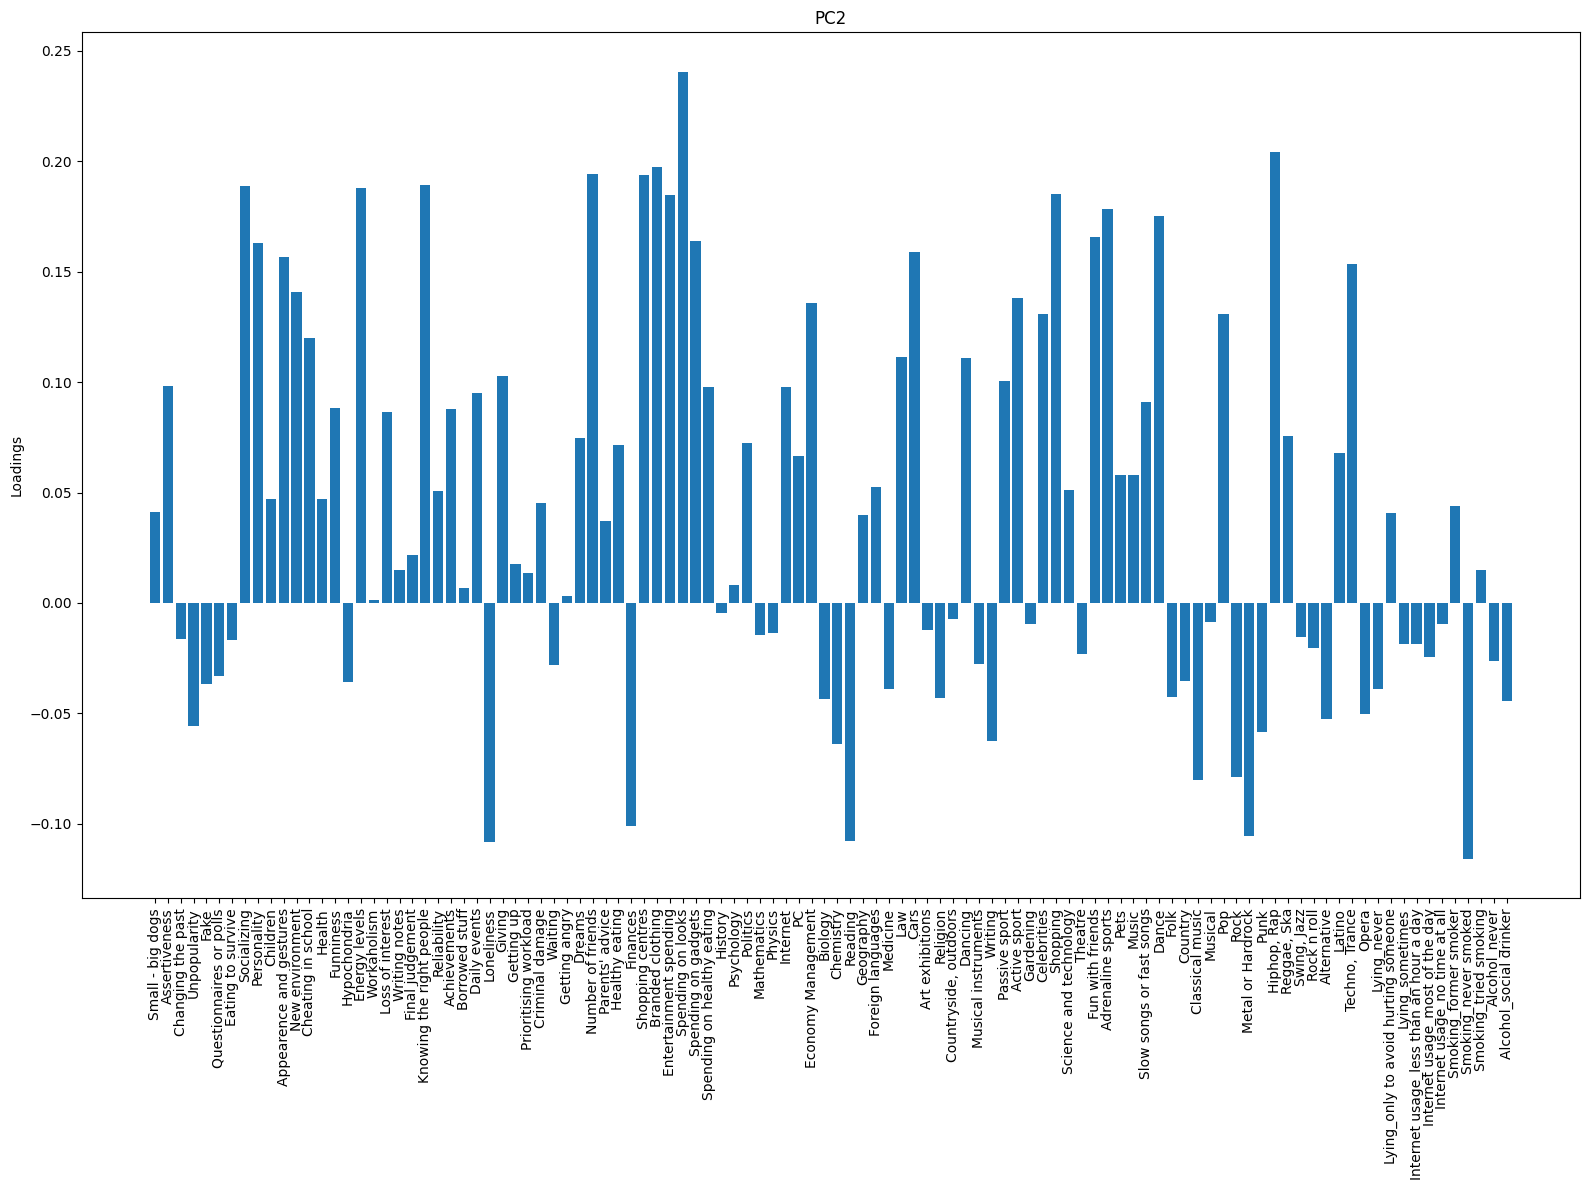

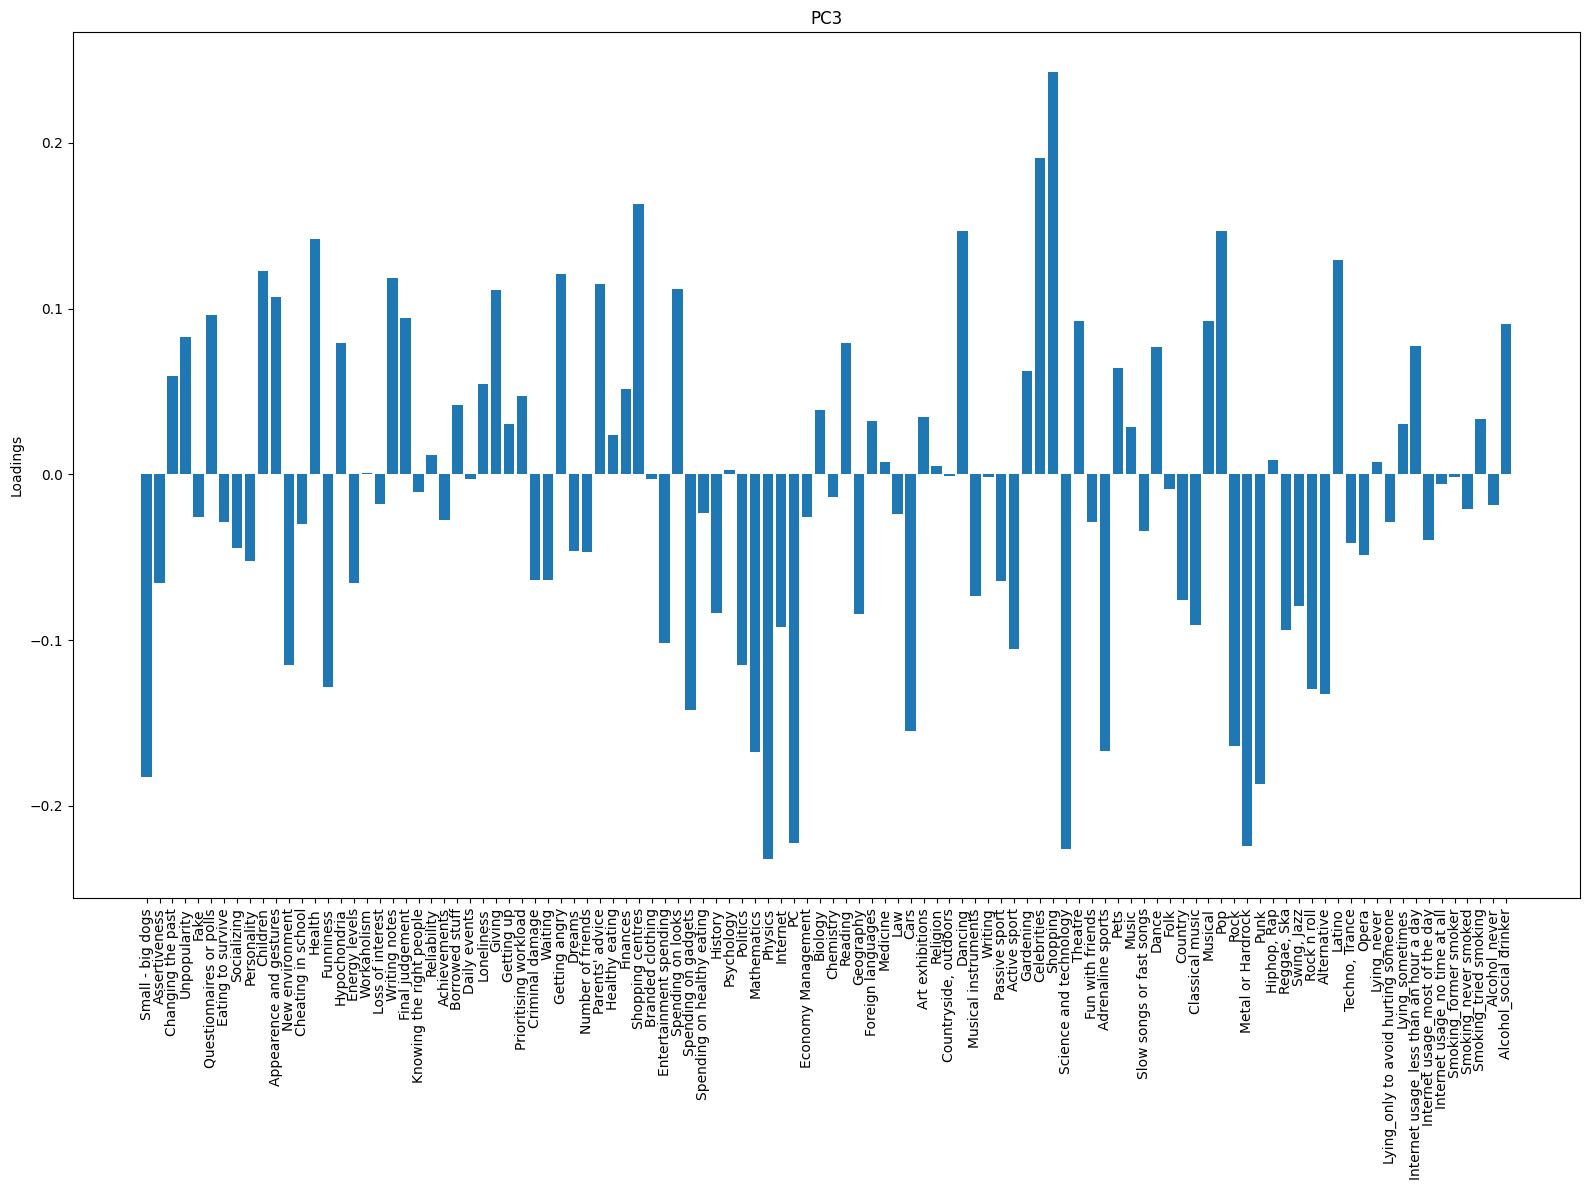

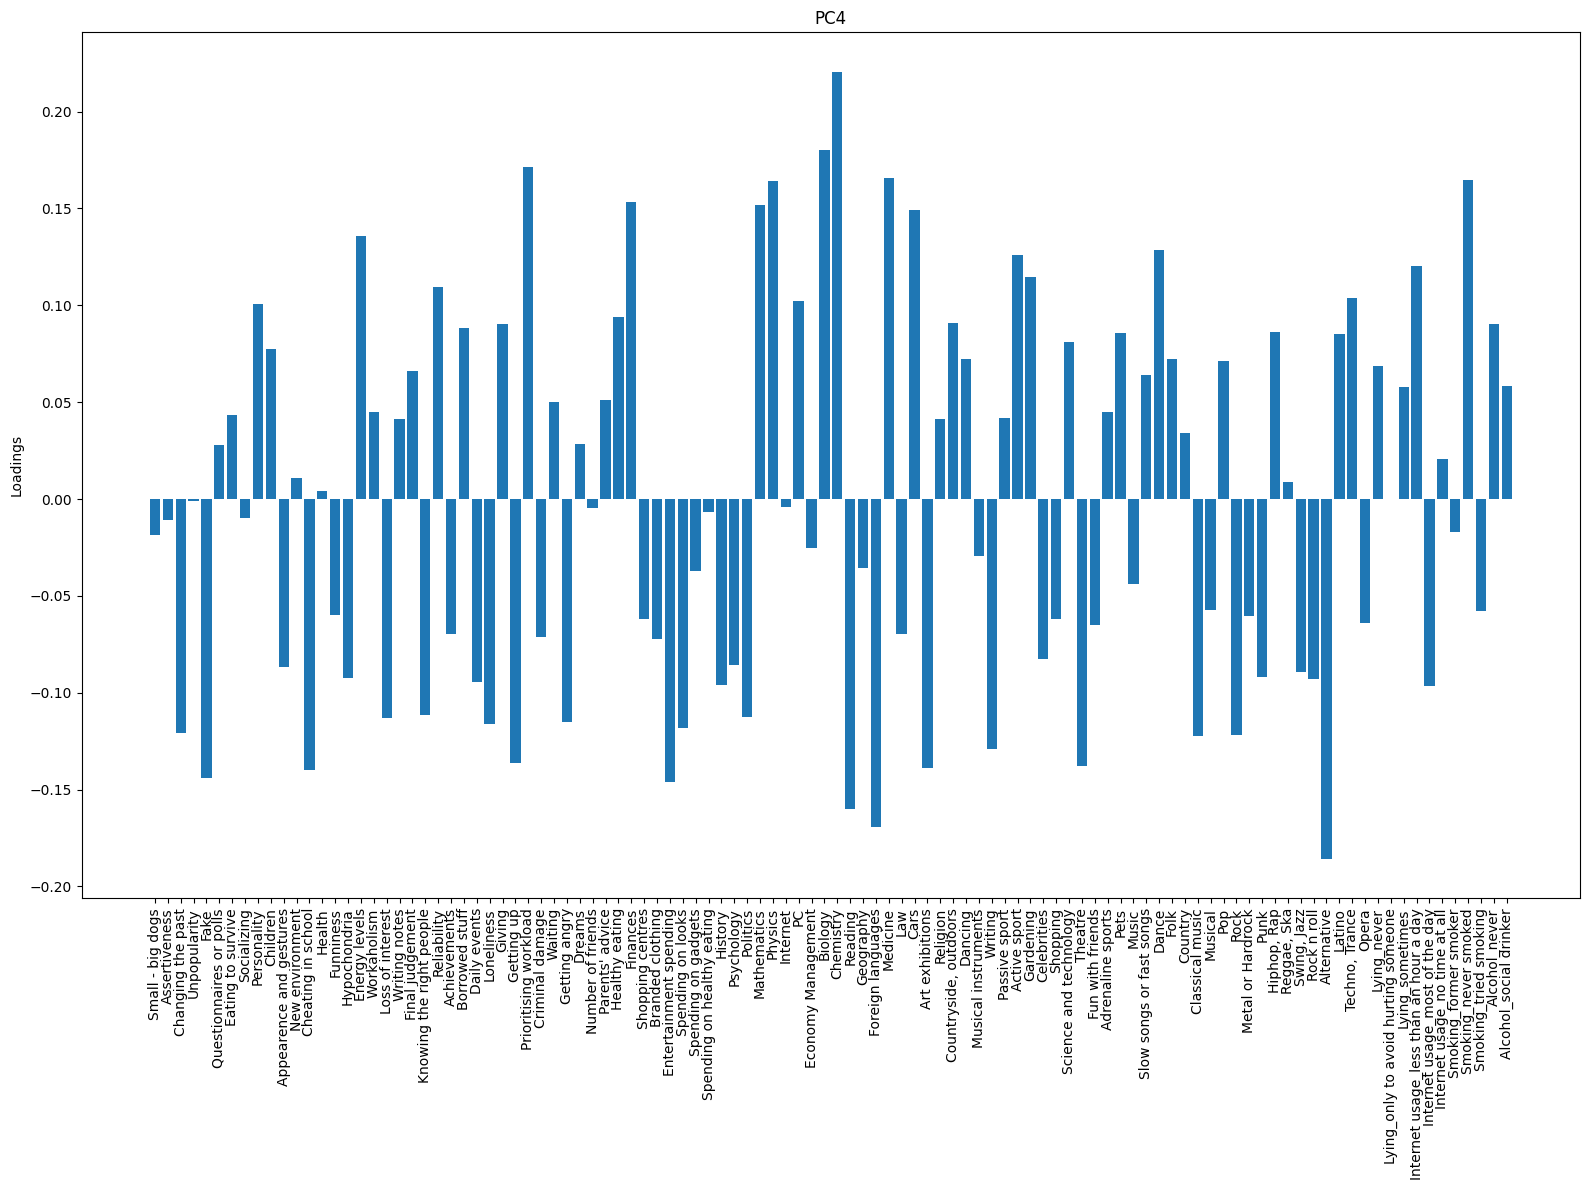

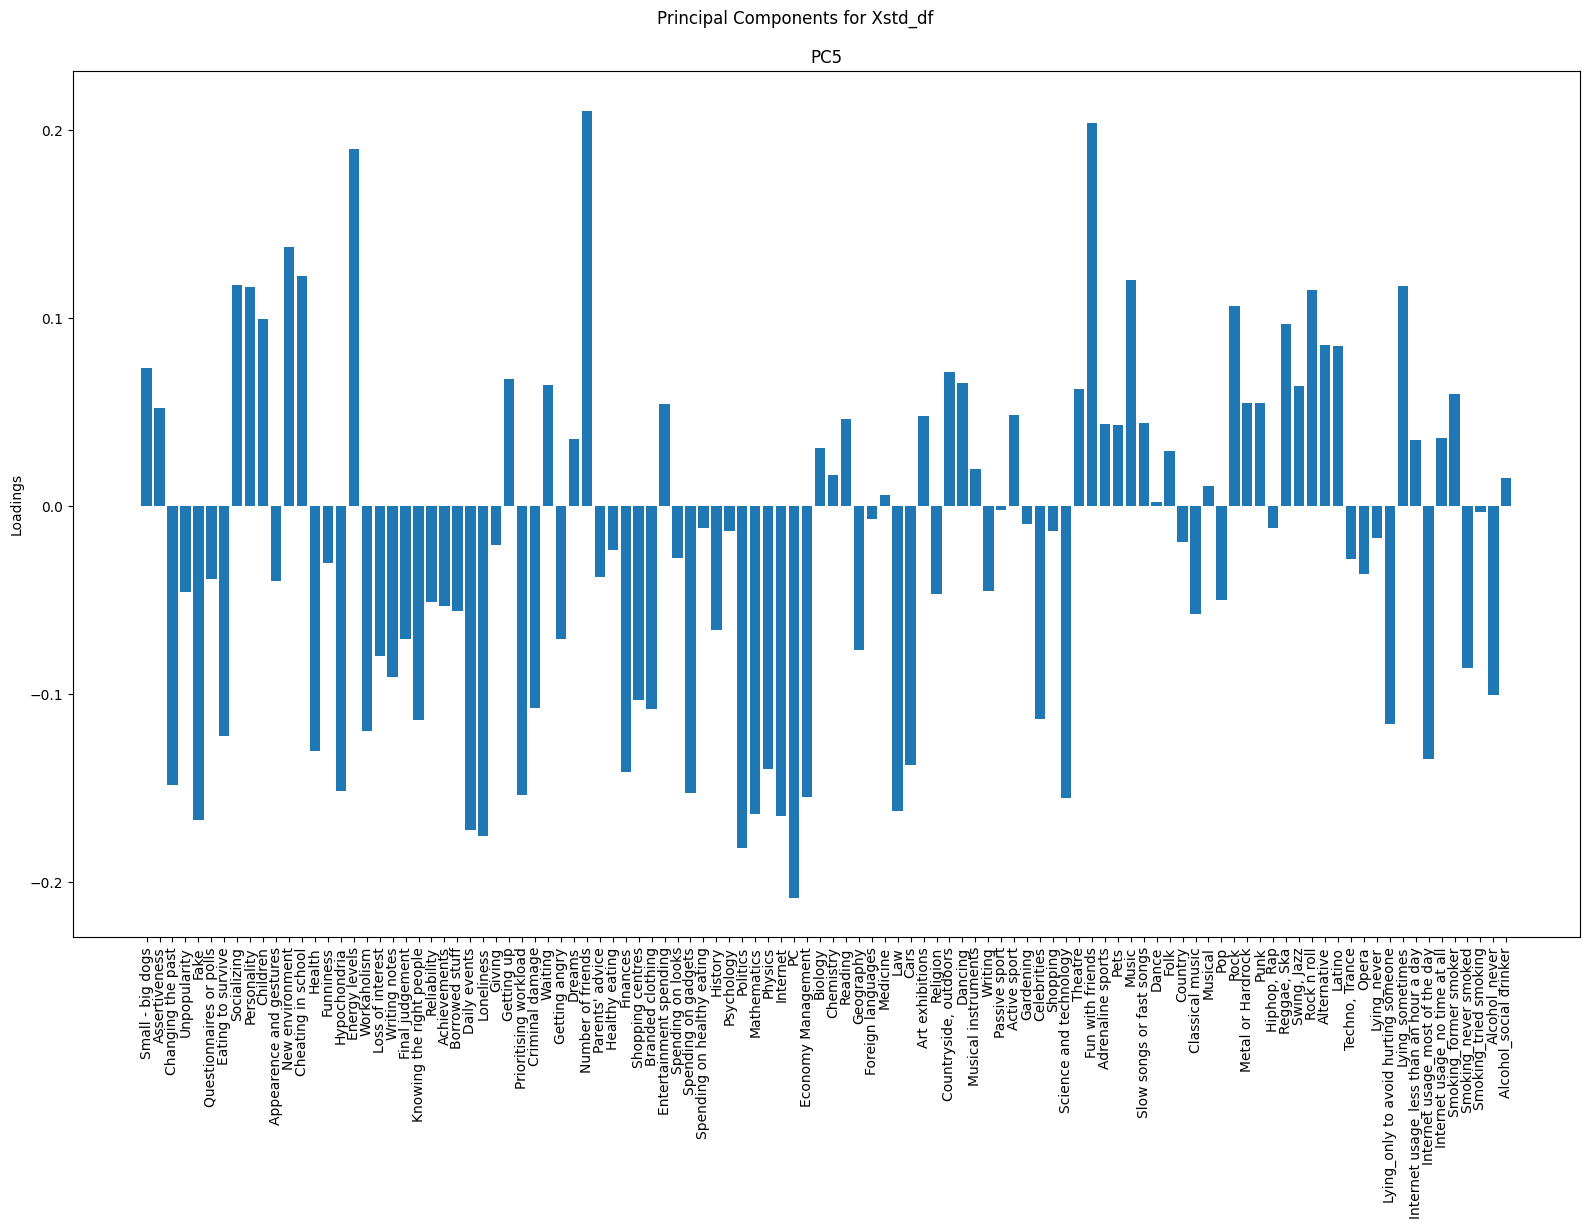

Principal Components for Xstd_df
Principle Component 1 , Positive features:  ['Art', 'Theatre', 'Classical', 'Opera', 'Poetry reading']
Principle Component 1 , Negative features:  ['I used to cheat at school.', 'Internet usage_most of the day', 'I damaged things in the past when angry.', 'I prefer.', 'I wish I could change the past because of the things I have done.']
-------------------------------------------------------------------
Principle Component 2 , Positive features:  ['I spend a lot of money on my appearance.', 'Hip hop, Rap', 'I prefer branded clothing to non branded.', 'I have lots of friends.', 'I enjoy going to large shopping centres.']
Principle Component 2 , Negative features:  ['Smoking_never smoked', 'I feel lonely in life.', 'Poetry reading', 'Metal, Hard rock', 'I save all the money I can.']
-------------------------------------------------------------------
Principle Component 3 , Positive features:  ['Shopping', 'Celebrity lifestyle', 'I enjoy going to large shop

<Figure size 1200x800 with 0 Axes>

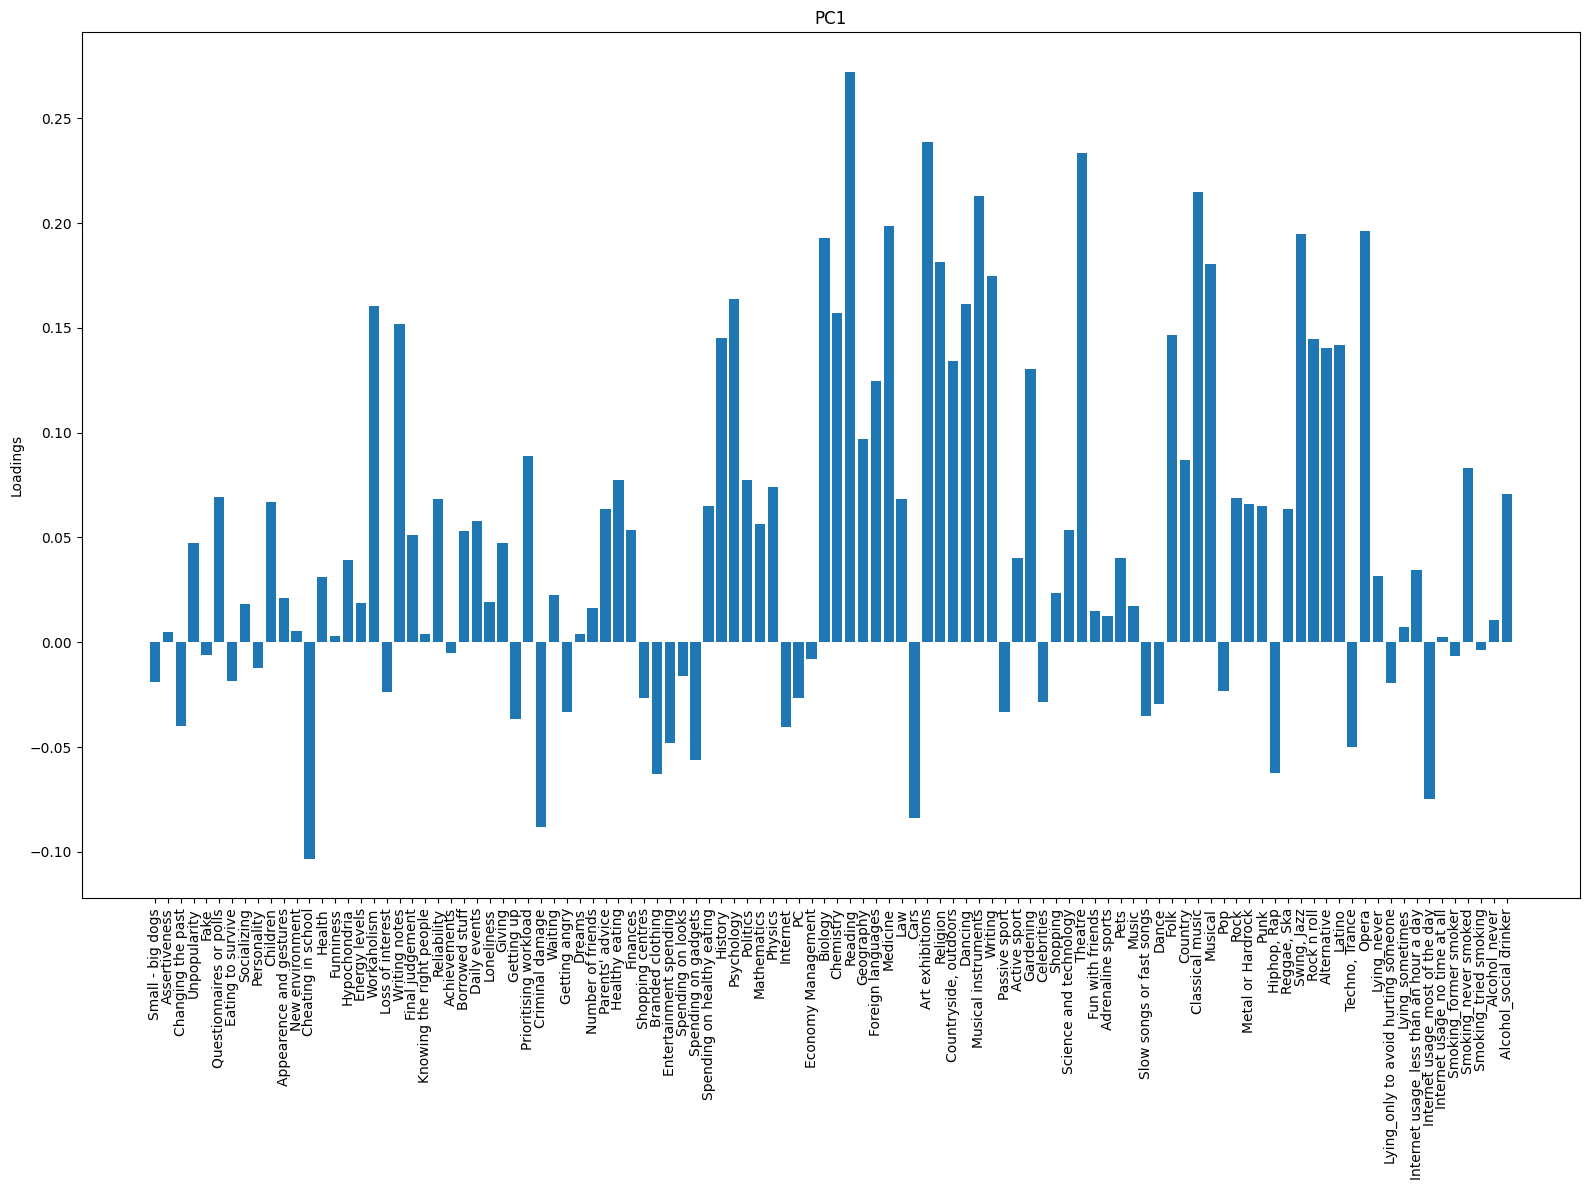

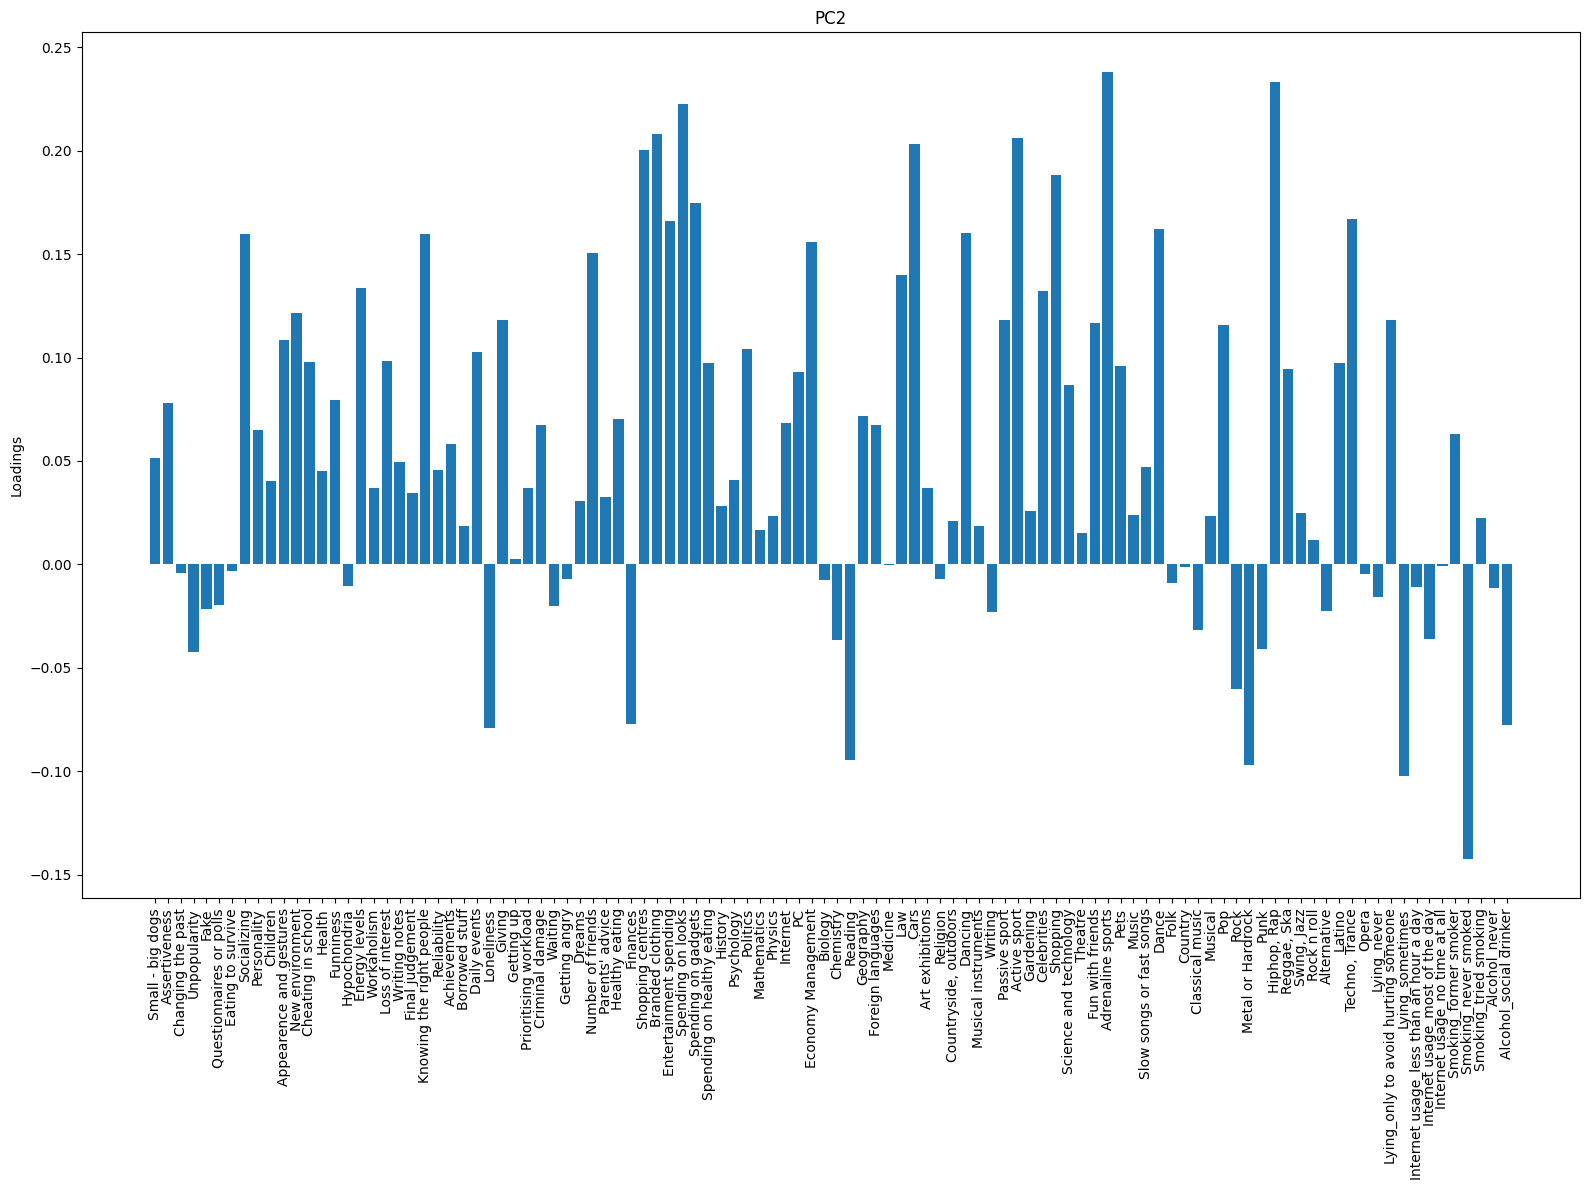

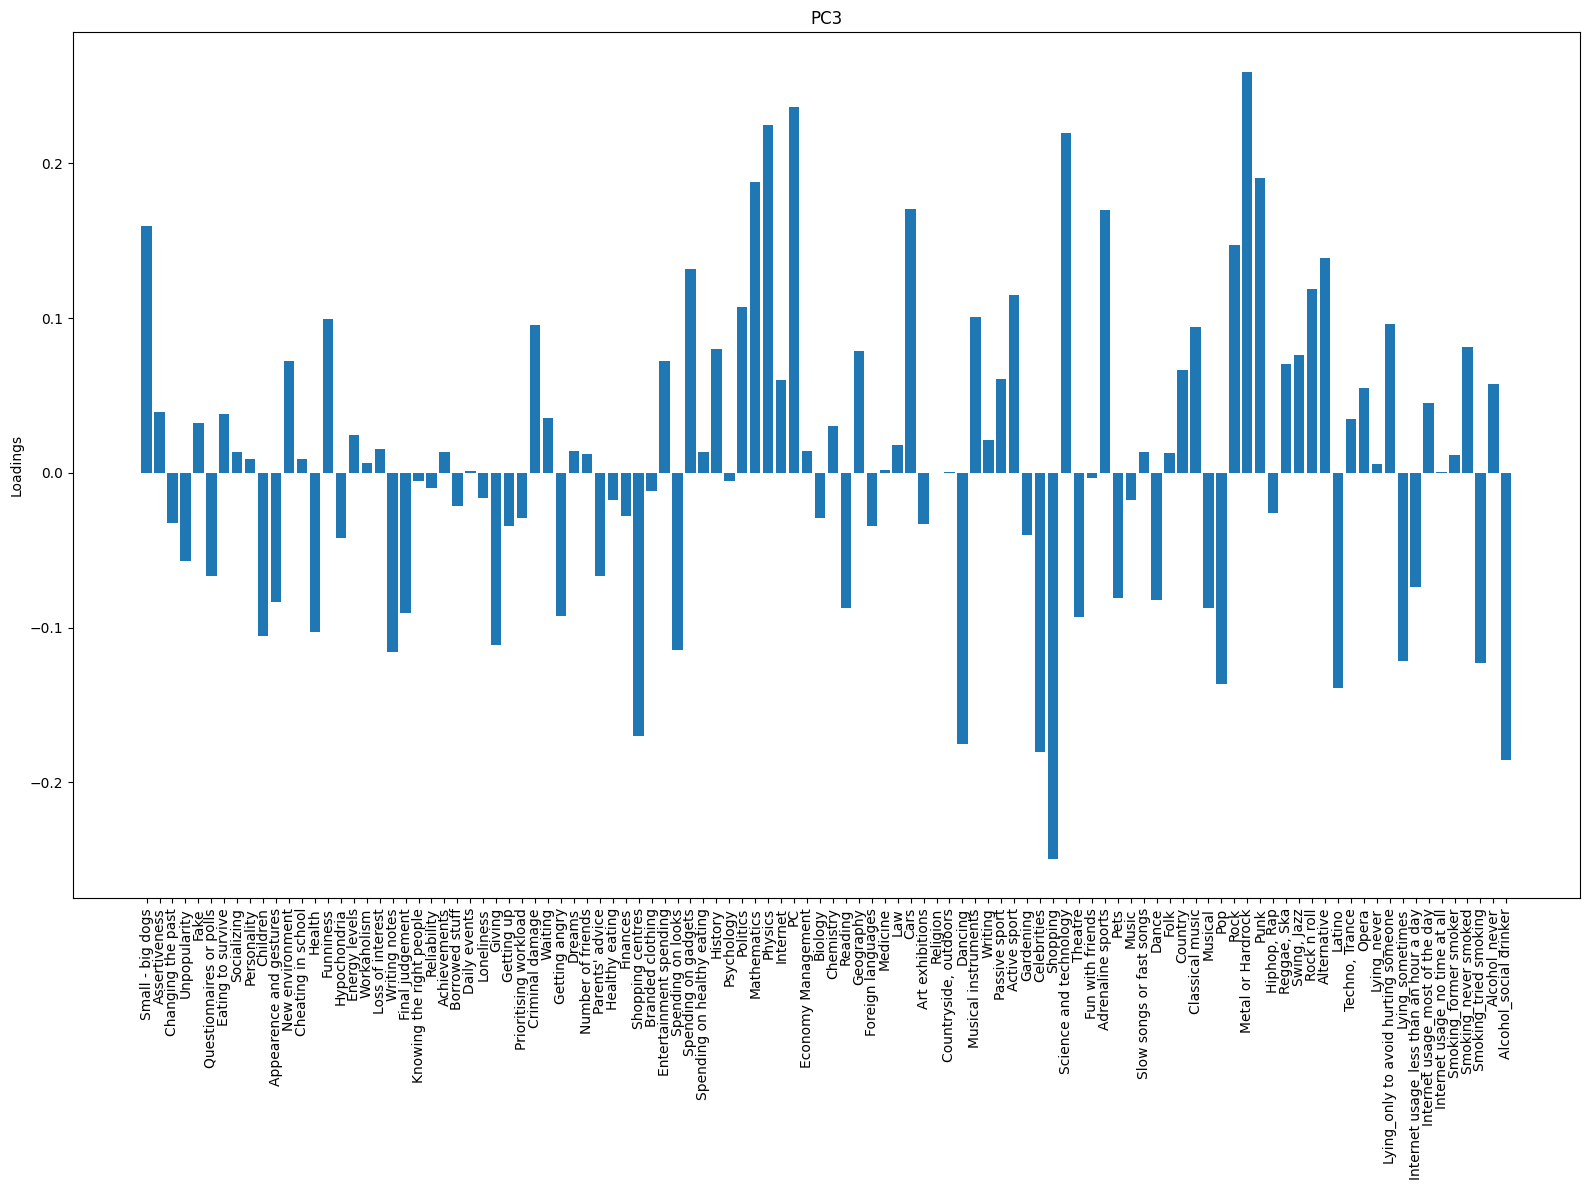

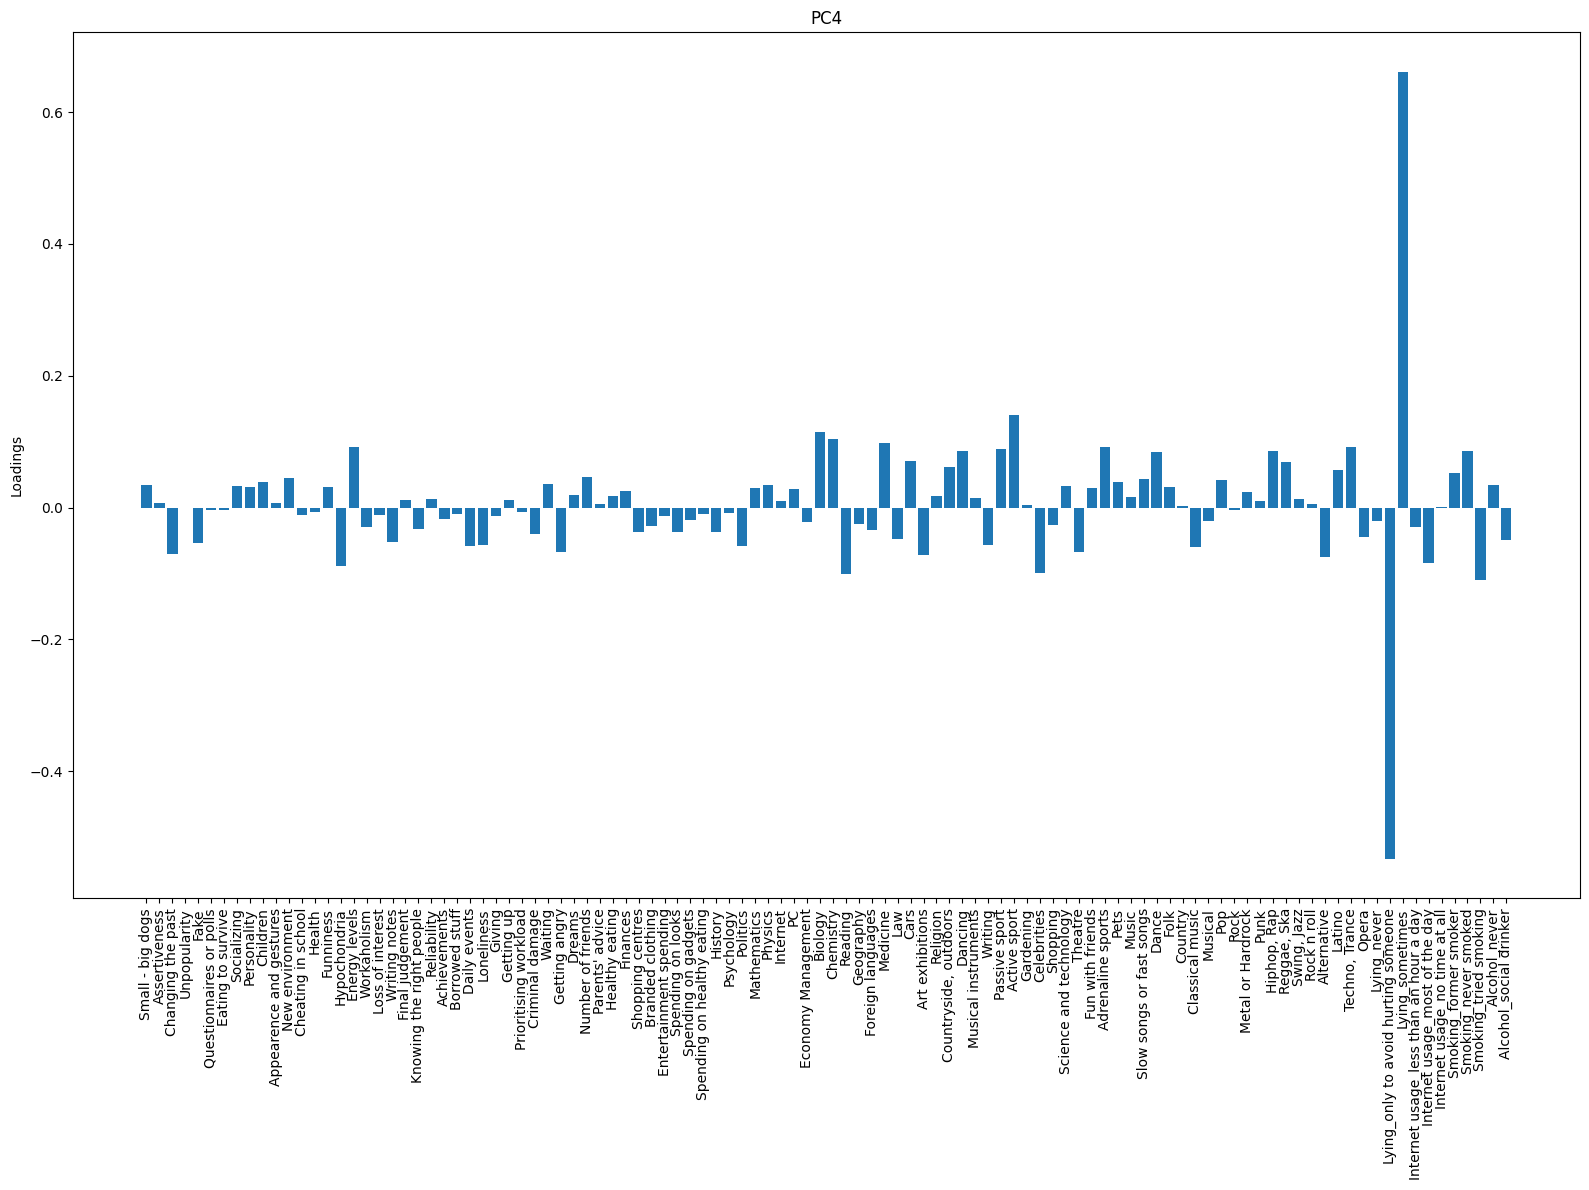

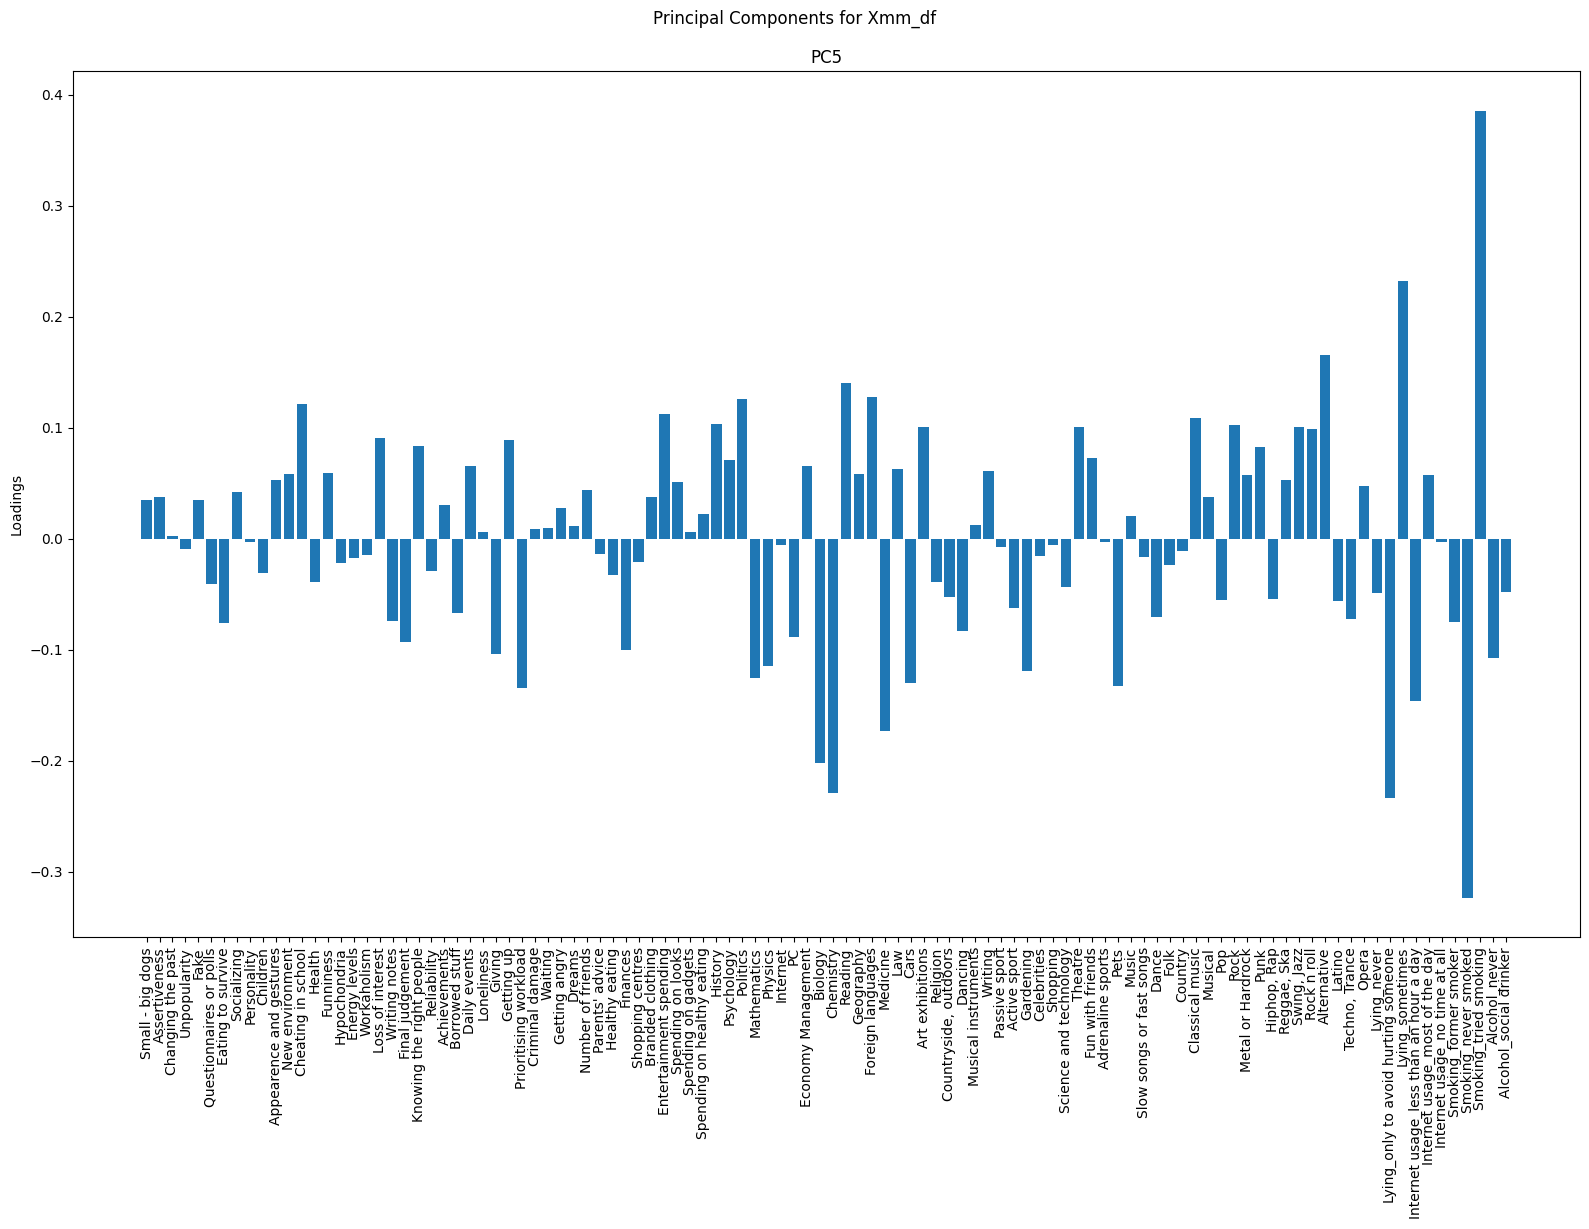

Principal Components for Xmm_df
Principle Component 1 , Positive features:  ['Poetry reading', 'Art', 'Theatre', 'Classical', 'Playing musical instruments']
Principle Component 1 , Negative features:  ['I used to cheat at school.', 'I damaged things in the past when angry.', 'Cars', 'Internet usage_most of the day', 'I prefer branded clothing to non branded.']
-------------------------------------------------------------------
Principle Component 2 , Positive features:  ['Adrenaline sports', 'Hip hop, Rap', 'I spend a lot of money on my appearance.', 'I prefer branded clothing to non branded.', 'Sport at competitive level']
Principle Component 2 , Negative features:  ['Smoking_never smoked', 'Lying_sometimes', 'Metal, Hard rock', 'Poetry reading', 'I feel lonely in life.']
-------------------------------------------------------------------
Principle Component 3 , Positive features:  ['Metal, Hard rock', 'PC Software, Hardware', 'Physics', 'Science and technology', 'Punk']
Principle Com

In [ ]:
columns_dicts = columns_hw.set_index('short')['original'].to_dict()
pca_std = PCA()
pca_std.fit(Xstd_df)
cumulative_variance_xstd = np.cumsum(pca_std.explained_variance_ratio_)
m_std = np.where(cumulative_variance_xstd >= 0.33)[0][0] + 1
m_stdc = min(m_std, 5)
reduced_pca_std = PCA(n_components=m_stdc)
pca_result_std = reduced_pca_std.fit_transform(Xstd_df)




pca_mm = PCA()
pca_mm.fit(Xmm_df)
cumulative_variance_xmm = np.cumsum(pca_mm.explained_variance_ratio_)
m_mm = np.where(cumulative_variance_xmm >= 0.33)[0][0] + 1
m_mmc = min(m_mm, 5)
reduced_pca_mm = PCA(n_components=m_mmc)
pca_result_mm = reduced_pca_mm.fit_transform(Xmm_df)




def visualize_pcs(pca, df, title):
    max_pos_comp = [[],[],[],[],[]]
    max_neg_comp = [[],[],[],[],[]]
    plt.figure(figsize=(12, 8))
    pcs = pca.components_
    num_pcs = pcs.shape[0]
    print(title)
    loadings_df = pd.DataFrame(pcs, columns=df.columns)

    for i in range(num_pcs):
        #print(pcs[i])
        top_pos_columns = loadings_df.iloc[i].sort_values(ascending=False).index[:5].tolist()
        top_neg_columns = loadings_df.iloc[i].sort_values(ascending=True).index[:5].tolist()
        #print(i)
        top_columns_original_pos = []
        for j in range(len(top_pos_columns)):
            if top_pos_columns[j] in columns_dicts:
                top_columns_original_pos.append(columns_dicts[top_pos_columns[j]])
            else:
                top_columns_original_pos.append(top_pos_columns[j])
        max_pos_comp[i].append(top_columns_original_pos)


        top_columns_original_neg = []
        for j in range(len(top_neg_columns)):
            if top_neg_columns[j] in columns_dicts:
                top_columns_original_neg.append(columns_dicts[top_neg_columns[j]])
            else:
                top_columns_original_neg.append(top_neg_columns[j])
        max_neg_comp[i].append(top_columns_original_neg)





        #plt.subplot(num_pcs // 2 + (num_pcs % 2), 2, i + 1)
        plt.figure(figsize=(16, 12))
        plt.bar(df.columns, pcs[i])
        plt.xticks(rotation=90)
        plt.title(f"PC{i+1}")
        plt.ylabel('Loadings')
        plt.tight_layout()
    plt.suptitle(title, y=1.02)
    plt.show()
    print(title)
    for i in range(1,6):
        print('Principle Component', i, ', Positive features: ', max_pos_comp[i-1][0])
        print('Principle Component', i, ', Negative features: ', max_neg_comp[i-1][0])
        print('-------------------------------------------------------------------')
visualize_pcs(reduced_pca_std, Xstd_df, "Principal Components for Xstd_df");
visualize_pcs(reduced_pca_mm, Xmm_df, "Principal Components for Xmm_df");


In [ ]:
## Naming PCs:
PC_names_std = ['Cultural Sophistication', 'Materialism & Social', 'Pop Culture & Consumerism', 'Academic & Disciplined', 'Outgoing & Socially Adaptive']
PC_names_mm = ['Artistic & Intellectual', 'Thrill-Seeking & Image-Focused', 'Analytical & Tech-Oriented.', 'Competitive & Rational', 'Rebellious & Artistic']

Standardized Data:
Number of PCs to explain 33% variance (m'): 10
Number of PCs used (m): 5


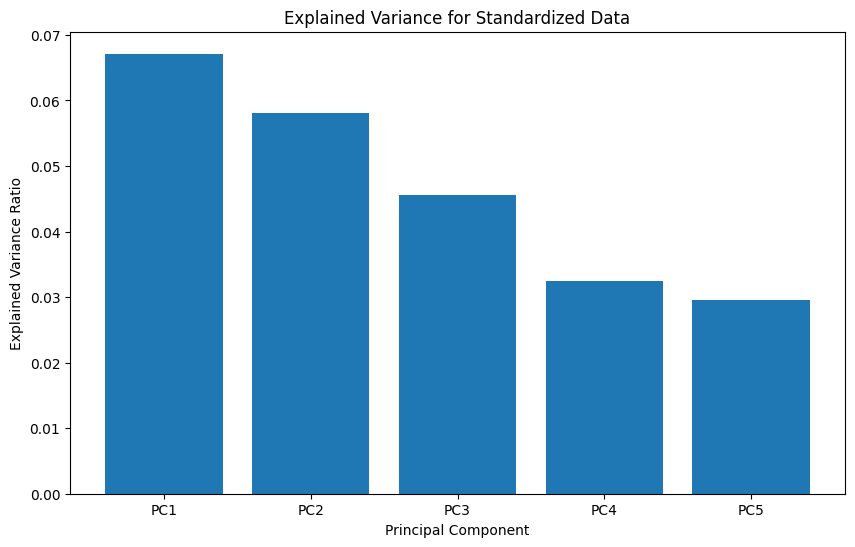

Possible Interpretations of PCs:
PC1: Explains 6.71% of variance
PC2: Explains 5.80% of variance
PC3: Explains 4.56% of variance
PC4: Explains 3.25% of variance
PC5: Explains 2.95% of variance


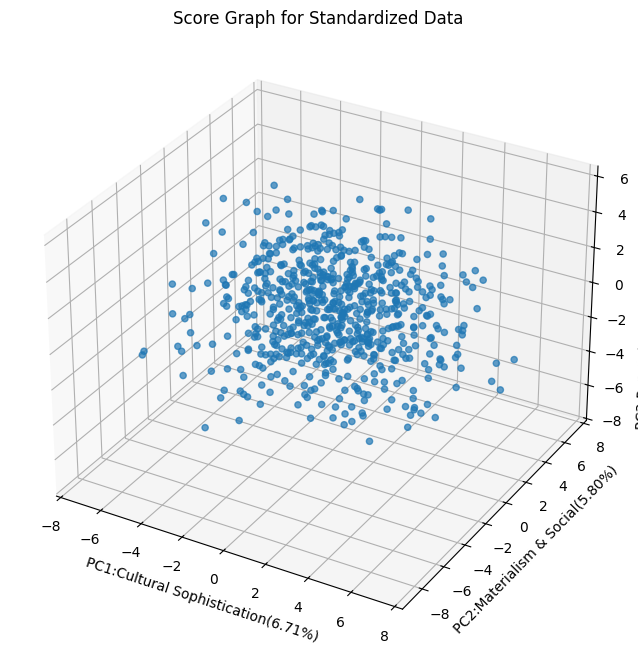

MinMax Scaled Data:
Number of PCs to explain 33% variance (m'): 8
Number of PCs used (m): 5


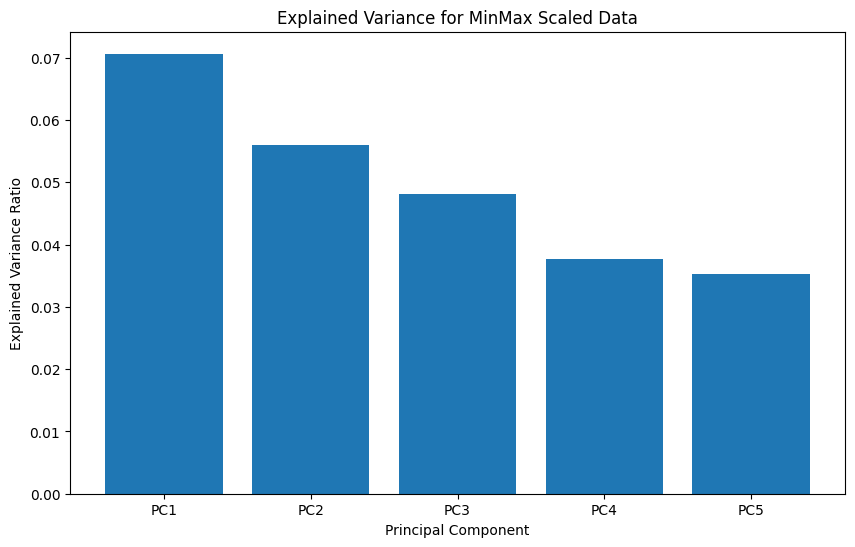

Possible Interpretations of PCs:
PC1: Explains 7.06% of variance
PC2: Explains 5.60% of variance
PC3: Explains 4.81% of variance
PC4: Explains 3.77% of variance
PC5: Explains 3.53% of variance


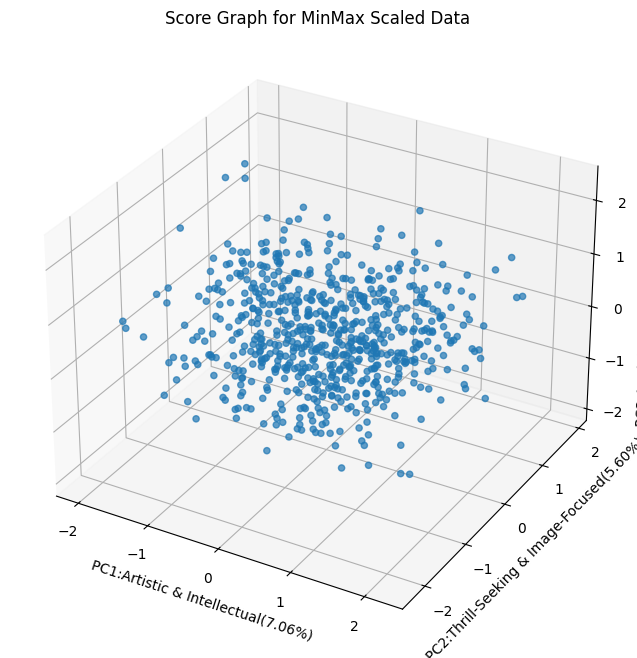

In [ ]:
def analyze_pca_reduction(df, title, names):
    pca = PCA()
    pca.fit(df)
    cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
    m_prime = np.where(cumulative_variance >= 0.33)[0][0] + 1
    m = min(m_prime, 5)  # Limit to a maximum of 5 PCs

    # Perform dimensionality reduction with m components
    reduced_pca = PCA(n_components=m)
    pca_result = reduced_pca.fit_transform(df)

    # Print summary of findings
    print(f'{title}:')
    print(f'Number of PCs to explain 33% variance (m\'): {m_prime}')
    print(f'Number of PCs used (m): {m}')

    # Visualize explained variance for the selected PCs
    pc_names = [f'PC{i+1}' for i in range(m)]
    plt.figure(figsize=(10, 6))
    plt.bar(pc_names, reduced_pca.explained_variance_ratio_)
    plt.xlabel('Principal Component')
    plt.ylabel('Explained Variance Ratio')
    plt.title(f'Explained Variance for {title}')
    plt.show()


    print("Possible Interpretations of PCs:")
    for i, variance in enumerate(reduced_pca.explained_variance_ratio_):
        print(f"PC{i+1}: Explains {variance:.2%} of variance")
    if m == 2:
        plt.figure(figsize=(8, 6))
        plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.7)
        a = 'PC1:' + names[0] +  f'({reduced_pca.explained_variance_ratio_[0]:.2%})'
        plt.xlabel(a)
        plt.ylabel(f'PC2 ({reduced_pca.explained_variance_ratio_[1]:.2%})')
        plt.title(f'Score Graph for {title}')
        plt.grid(True)
        plt.show()
    elif m >= 3:
        fig = plt.figure(figsize=(10, 8))
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(pca_result[:, 0], pca_result[:, 1], pca_result[:, 2], alpha=0.7)
        a = 'PC1:' + names[0] +  f'({reduced_pca.explained_variance_ratio_[0]:.2%})'
        ax.set_xlabel(a)
        b = 'PC2:' + names[1] +  f'({reduced_pca.explained_variance_ratio_[1]:.2%})'
        ax.set_ylabel(b)
        c = 'PC3:' + names[2] +  f'({reduced_pca.explained_variance_ratio_[2]:.2%})'
        ax.set_zlabel(c)
        plt.title(f"Score Graph for {title}")
        plt.show()

# Apply PCA reduction and visualize results for both datasets
analyze_pca_reduction(Xstd_df, "Standardized Data", PC_names_std)
analyze_pca_reduction(Xmm_df, "MinMax Scaled Data", PC_names_mm)


**Explained Variance Ratio**

Standardized Data:

Number of PCs for 33% Variance (
𝑚
′
 ): 10
Number of PCs Used (
𝑚
): 5

The first principal component (PC1) explains 6.71% of the total variance.
Subsequent components (PC2, PC3, PC4, PC5) explain progressively smaller amounts of variance, ranging from 5.80% to 2.95%.
Variance is distributed more evenly across components due to standardization, which ensures all features contribute equally.



MinMax Scaled Data:

Number of PCs for 33% Variance (
𝑚
′
 ): 8
Number of PCs Used (
𝑚): 5

The first principal component (PC1) explains 7.06% of the total variance, slightly higher than for standardized data.
Variance contributions from subsequent components (PC2 to PC5) are slightly more uneven compared to standardized data, with PC2 explaining 5.60% and PC5 explaining 3.53%.
MinMax scaling preserves relative feature scales, leading to slightly larger variance contributions from features with originally higher ranges.


**Score Graphs (3D PCA Visualization):**

Standardized Data:

Points are more uniformly distributed in the 3D PCA space.
The spread along PC1, PC2, and PC3 suggests a balanced variance contribution from multiple features.
Standardization allows all features to influence the PCs equally, leading to a more balanced distribution of data points in the reduced-dimensional space.

MinMax Scaled Data:

Points are slightly more concentrated in specific regions of the 3D space.
PC1 appears to dominate the spread of the data, indicating that features with originally larger ranges had more influence on the principal components.

MinMax scaling may amplify the influence of features with high original ranges, resulting in less uniform distributions in the PCA-reduced space.

## Exercise 4. $k$-Means

In the cells below, do the following operations:
1. For each one of the two datasets (_std_ and _mm_), run the $k$-Means for clustering the data. In particular, **use the silohuette score for identify the best value for $k\in\{3, \ldots, 10\}$**.
2. Plot the score graphs of exercise 3.3, adding the centroids of the cluster.
3. Observing the centroids coordinates in the PC space, **give a name/interpretation to them**, exploiting the names you assigned to the PCs. **Comment and motivate your interpretations**.  
### Explaining the code for Excercise 4:
* Silhouette Score: is a metric used to evaluate the quality of clustering results. It measures how well each data point fits within its assigned cluster compared to other clusters. For each data point 𝑖:  
 * 𝑎(𝑖): Mean distance between 𝑖 and all other points in the same cluster.  
 * 𝑏(𝑖): Mean distance between 𝑖 and all points in the nearest different cluster.
  
  The silhouette score for point 𝑖 is:
$$
𝑠(𝑖) = \frac{𝑏(𝑖) - 𝑎(𝑖)}{max⁡(𝑎(𝑖),𝑏(𝑖))}
$$
Intuition behind this score to understand it better:  
\+1: Perfect clustering (well-matched to its own cluster, far from others)  
0: On or near the decision boundary between clusters  
\-1: Misclassified (closer to another cluster than its own)  
The mean of all individual silhouette scores gives an overall evaluation of clustering performance.  
  
    
As you can see in the cell below, first we loop on values from 3 to 11 for k, to see which has higher Silhouette Score. Interestengly, the best value for k in MinMax and Standard are different, 5 and 3 respectively.  
Finally we visualized the centerpoints of each clusters.

Best number of clusters (k) for Standardized Data: 3
Silhouette Score for Standardized Data: 0.15848092826445526


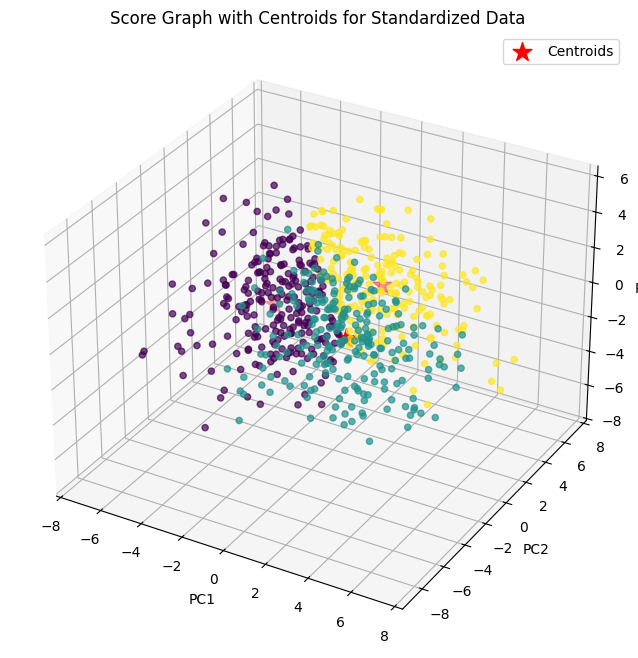


Cluster Centroids for Standardized Data:
Centroid 1: [-2.78666132 -0.09889202 -0.54376304  0.22331524 -0.07003383]
Centroid 2: [ 1.660343   -1.93735417  0.00720314 -0.10521458  0.18981271]
Centroid 3: [ 1.16037269  2.33641389  0.59064554 -0.12499905 -0.14110006]
Best number of clusters (k) for MinMax Scaled Data: 7
Silhouette Score for MinMax Scaled Data: 0.15821475163665305


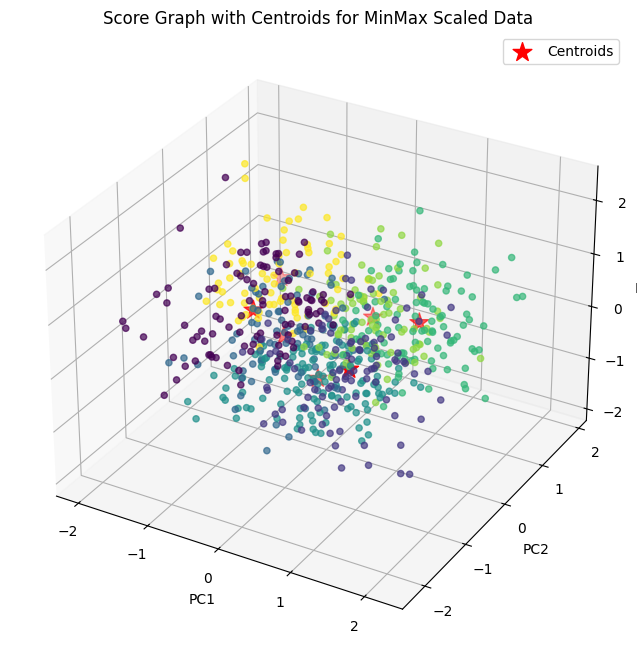


Cluster Centroids for MinMax Scaled Data:
Centroid 1: [-0.66828622 -0.60373666  0.61376488  0.20153091  0.21781527]
Centroid 2: [ 0.81171825 -0.84881734  0.25338115 -0.16189139 -0.09512916]
Centroid 3: [-0.5743163  -0.05324978 -0.21316433 -0.72659517 -0.51974675]
Centroid 4: [-0.04969323 -0.12191835 -0.77437078  0.31335968  0.2302491 ]
Centroid 5: [ 0.97663771  0.57179855  0.21279017  0.45209779 -0.21133023]
Centroid 6: [ 0.27171807  0.67067851 -0.02001705 -0.69950314  0.31741759]
Centroid 7: [-1.02139031  0.63255252  0.2725552   0.41317912 -0.07624848]


In [ ]:
# Function to perform k-Means clustering and analyze results
def analyze_kmeans(df, title):
    # Reduce dimensions using PCA (limit to 5 PCs or fewer)
    pca = PCA(n_components=min(df.shape[1], 5))
    pca_result = pca.fit_transform(df)

    # Evaluate silhouette scores for k = 3 to 10
    silhouette_scores = []
    for k in range(3, 11):
        kmeans = KMeans(n_clusters=k, random_state=random_seed)
        cluster_labels = kmeans.fit_predict(pca_result)
        score = silhouette_score(pca_result, cluster_labels)
        silhouette_scores.append(score)

    # Determine the best k based on silhouette score
    best_k = np.argmax(silhouette_scores) + 3
    print(f"Best number of clusters (k) for {title}: {best_k}")
    print(f"Silhouette Score for {title}: {silhouette_scores[best_k - 3]}")
    # Fit k-Means using the best k
    kmeans = KMeans(n_clusters=best_k, random_state=random_seed)
    cluster_labels = kmeans.fit_predict(pca_result)

    # Plot the results with centroids
    m = min(pca_result.shape[1], 3)  # Limit plotting to 2D or 3D
    if m == 2:
        plt.figure(figsize=(8, 6))
        plt.scatter(pca_result[:, 0], pca_result[:, 1], c=cluster_labels, cmap='viridis', alpha=0.7)
        plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='*', label='Centroids')
        plt.xlabel('PC1')
        plt.ylabel('PC2')
        plt.title(f'Score Graph with Centroids for {title}')
        plt.legend()
        plt.grid(True)
        plt.show()
    elif m == 3:
        fig = plt.figure(figsize=(10, 8))
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(pca_result[:, 0], pca_result[:, 1], pca_result[:, 2], c=cluster_labels, cmap='viridis', alpha=0.7)
        ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], s=200, c='red', marker='*', label='Centroids')
        ax.set_xlabel('PC1')
        ax.set_ylabel('PC2')
        ax.set_zlabel('PC3')
        plt.title(f'Score Graph with Centroids for {title}')
        plt.legend()
        plt.show()

    # Display the centroids and provide example interpretations
    print(f"\nCluster Centroids for {title}:")
    for i, centroid in enumerate(kmeans.cluster_centers_):
        print(f"Centroid {i+1}: {centroid}")
    return kmeans, pca_result
# Run k-Means analysis for standardized and MinMax scaled datasets
kmeans_std, pca_result_std = analyze_kmeans(Xstd_df, "Standardized Data")
kmeans_mm, pca_result_mm = analyze_kmeans(Xmm_df, "MinMax Scaled Data")


### Interpretation of centeroids of std dataset:  
####Centroid 1: Tech-Savvy & Rule-Breaking vs. Artistic & Cultured
Positively related: Interest in cars, heavy internet usage, cheating in school, criminal damage, PCs, and gadgets. Suggests a tech-savvy, rebellious, and possibly impulsive personality.    
Negatively related: Dislikes theatre, art exhibitions, reading, musicals, opera, classical music, swing/jazz, and dancing—suggesting a lack of interest in arts and culture.    
####Centroid 2: Intellectual & Artistic vs. Materialistic & Trend-Focused
Positively related: Enjoys reading, classical music, opera, theatre, art exhibitions, writing, jazz, and alternative music—indicating a deep appreciation for intellectual and artistic pursuits.    
Negatively related: Dislikes branded clothing, hip-hop/rap, spending on looks, cars, gadgets, shopping, and entertainment spending—suggesting a lack of materialistic and trend-following tendencies.    
####Centroid 3: Social & Appearance-Oriented vs. Alternative & Independent
Positively related: Heavy focus on appearance, shopping, socializing, networking, and dancing—suggesting an extroverted, appearance-conscious, and status-aware personality.    
Negatively related: Dislikes metal, hard rock, punk, and financial concerns, and has never smoked. Suggests a preference for mainstream social life over alternative or independent subcultures.    
     
         

### Interpretation of centeroids of mm dataset:  
#### Centroid 1: Social & Fun-Loving with a Rebellious Streak
Positively related: Strong interest in music and rock, high internet usage, enjoys fun with friends, borrows things, social drinking, and sometimes lies. Suggests an outgoing, fun-loving, and somewhat rebellious personality.
Negatively related: Avoids abstinence (alcohol, internet, lying), dislikes techno/trance, and doesn’t strongly avoid smoking.    
####Centroid 2: Social, Outdoorsy & Intellectual
Positively related: Loves music, enjoys socializing, spending time in the countryside, borrowing things, rock music, and values reliability and foreign languages. Suggests an intellectually curious, social, and outdoor-loving personality.
Negatively related: Avoids excessive internet usage, celebrity culture, and materialism.    
####Centroid 3: Social & Strategic Thinker with a Pragmatic Mindset
Positively related: Enjoys music, fun with friends, internet, borrowing things, foreign languages, and reliability but also has a tendency to cheat in school. Suggests a social, strategic, and pragmatic thinker who values networking and efficiency.
Negatively related: Avoids strict moral stances on lying, doesn’t abstain from alcohol, and isn’t overly concerned about smoking habits.    
####Centroid 4: Energetic, Competitive, and Tech-Oriented
Positively related: Loves music, high internet use, fun with friends, enjoys passive sports, has high energy levels, and is tech-savvy (PC usage). Also shows a tendency toward cheating in school, suggesting a competitive and pragmatic personality.
Negatively related: Not particularly religious, doesn’t spend much time on writing, gardening, or opera, and isn’t highly abstinent.    
####Centroid 5: Fun-Loving, Social, and Materialistic
Positively related: Loves music, enjoys social drinking, shopping, borrowing things, and spending time with children. Also prone to lying sometimes, suggesting a flexible moral stance in social situations.
Negatively related: Doesn’t strictly avoid alcohol or lying, and doesn’t have a strong focus on intellectual pursuits like physics.    


Centroid 1:
Positively related features:
    Cars: 0.22965466815319932
    Internet usage_most of the day: 0.22620294774580174
    Cheating in school: 0.22570980931065493
    Criminal damage: 0.20532306253858482
    PC: 0.16980965312317034
    Internet: 0.15969397952255363
    Slow songs or fast songs: 0.1481017749257609
    Spending on gadgets: 0.1432415478824104

 Negatively related features:
    Theatre: -0.6948526449135954
    Art exhibitions: -0.68340192852335
    Reading: -0.6484764484134939
    Musical: -0.58514223790995
    Opera: -0.5681404430238154
    Classical music: -0.5642225592264719
    Swing, Jazz: -0.5442544322311686
    Dancing: -0.5074446661206863

Centroid 2:
Positively related features:
    Reading: 0.5791370220223138
    Classical music: 0.512811492641411
    Opera: 0.4474985566605526
    Theatre: 0.4359226073435792
    Art exhibitions: 0.4242035585549875
    Writing: 0.3937248559710796
    Swing, Jazz: 0.38714584071105
    Alternative: 0.35876935633299434

 Neg

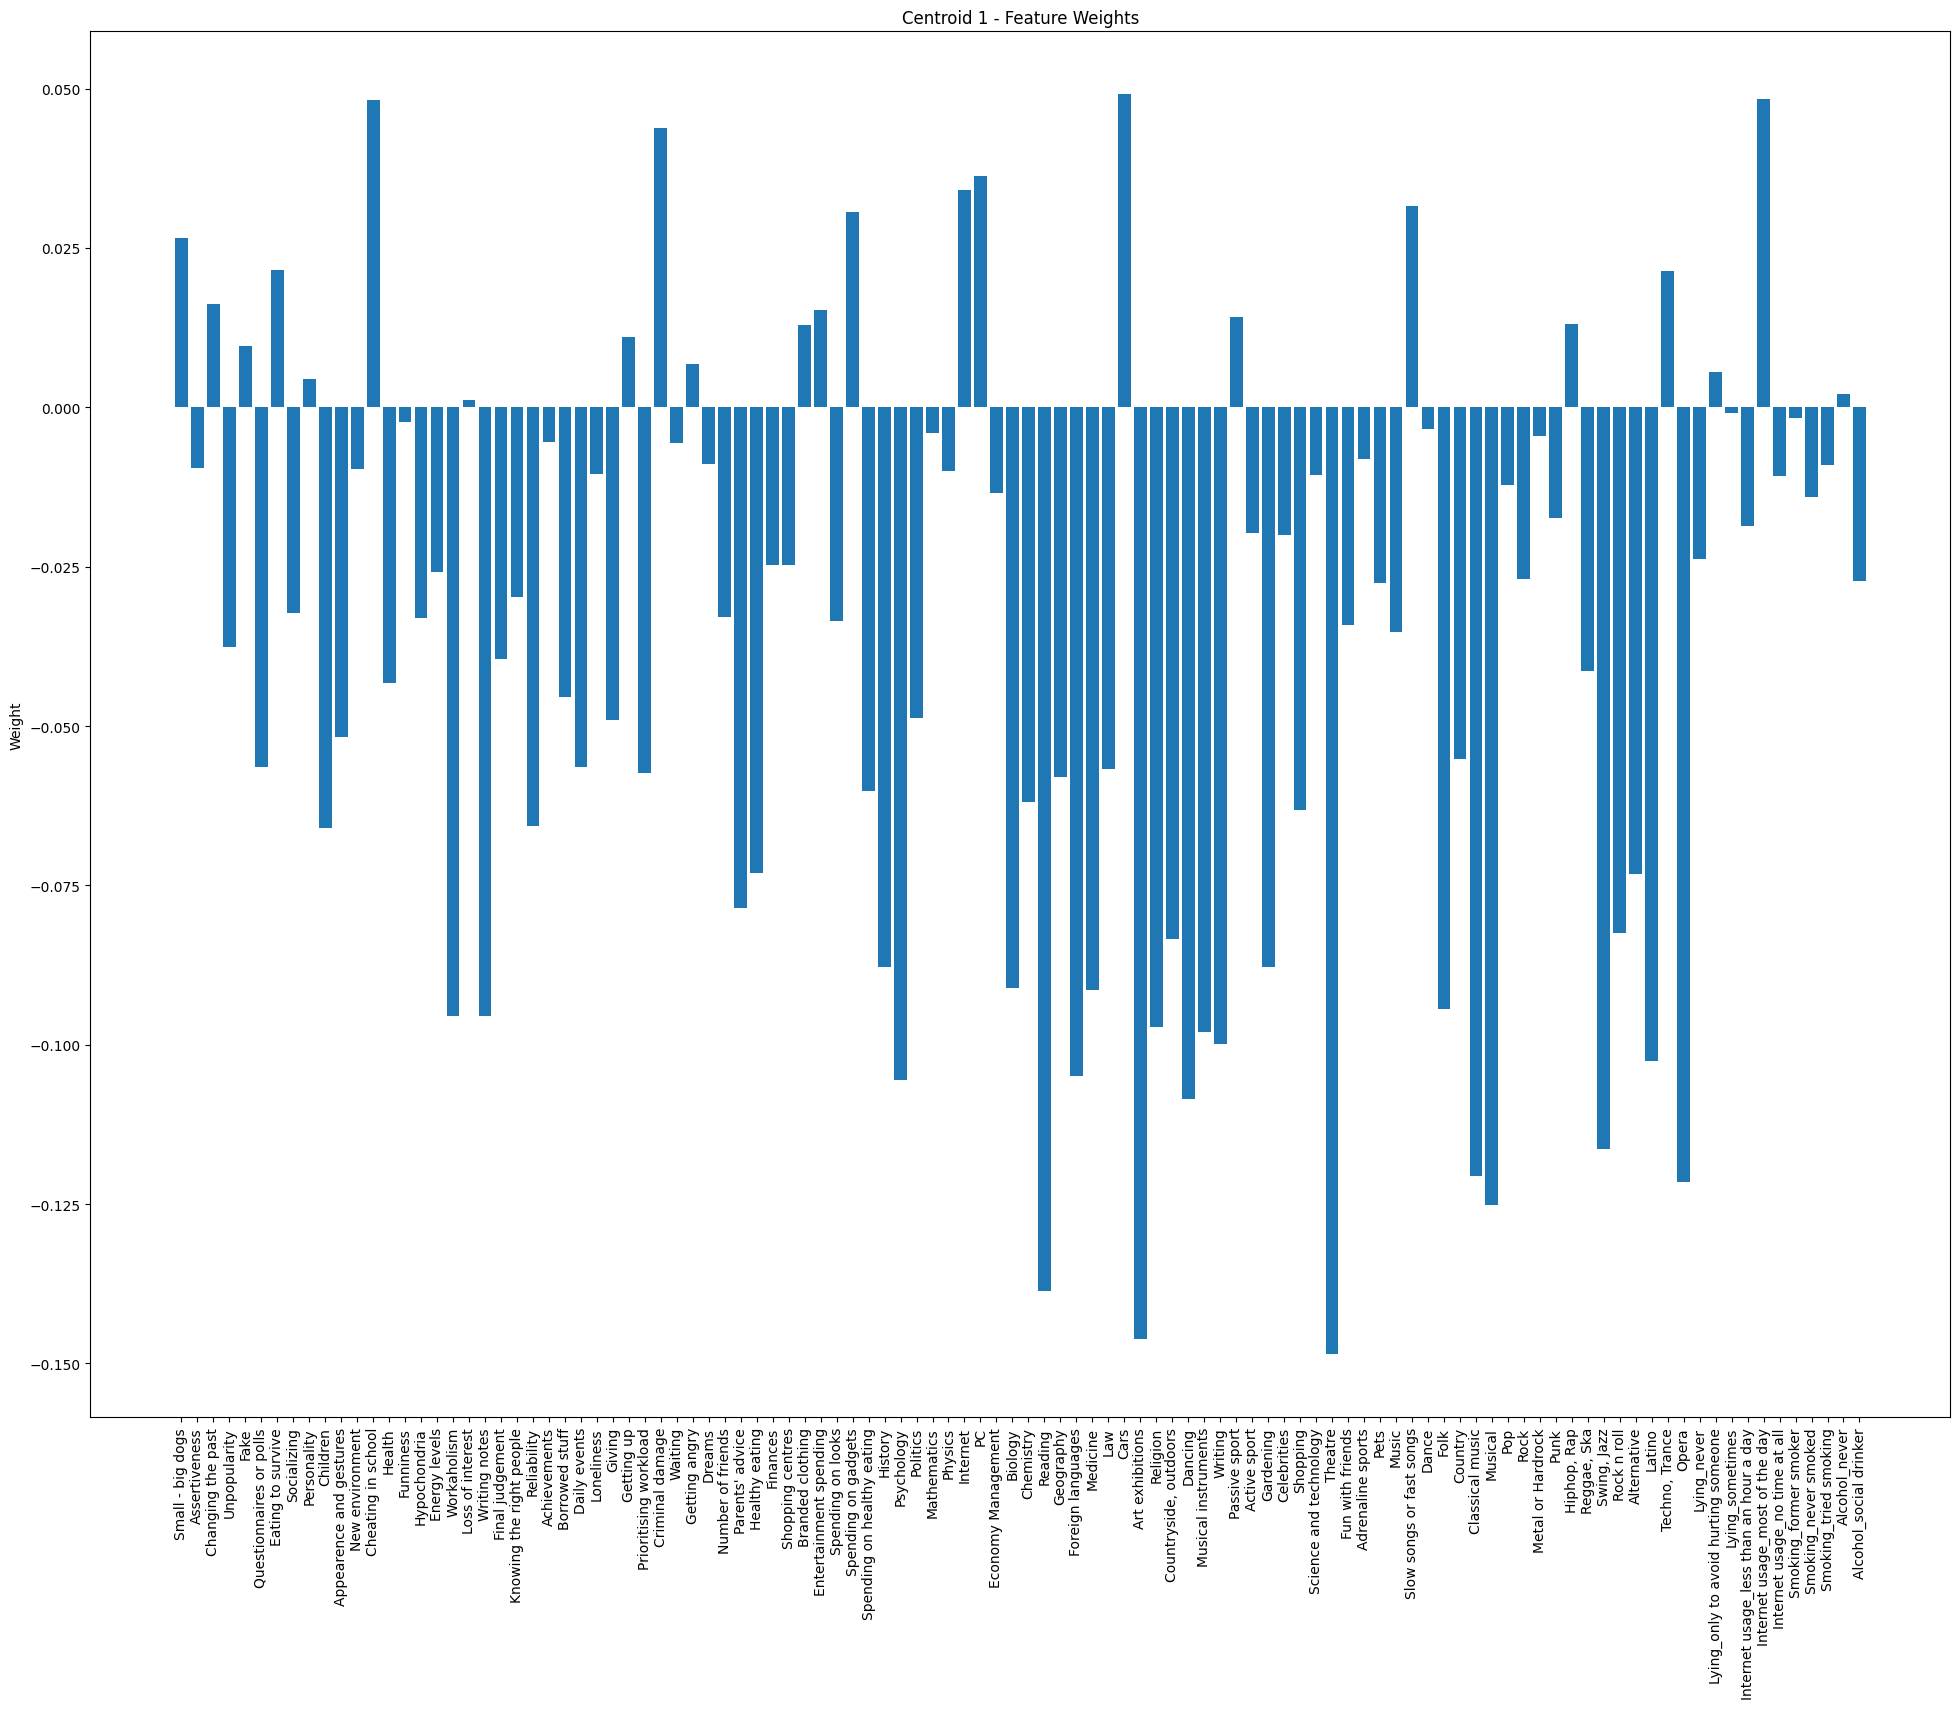

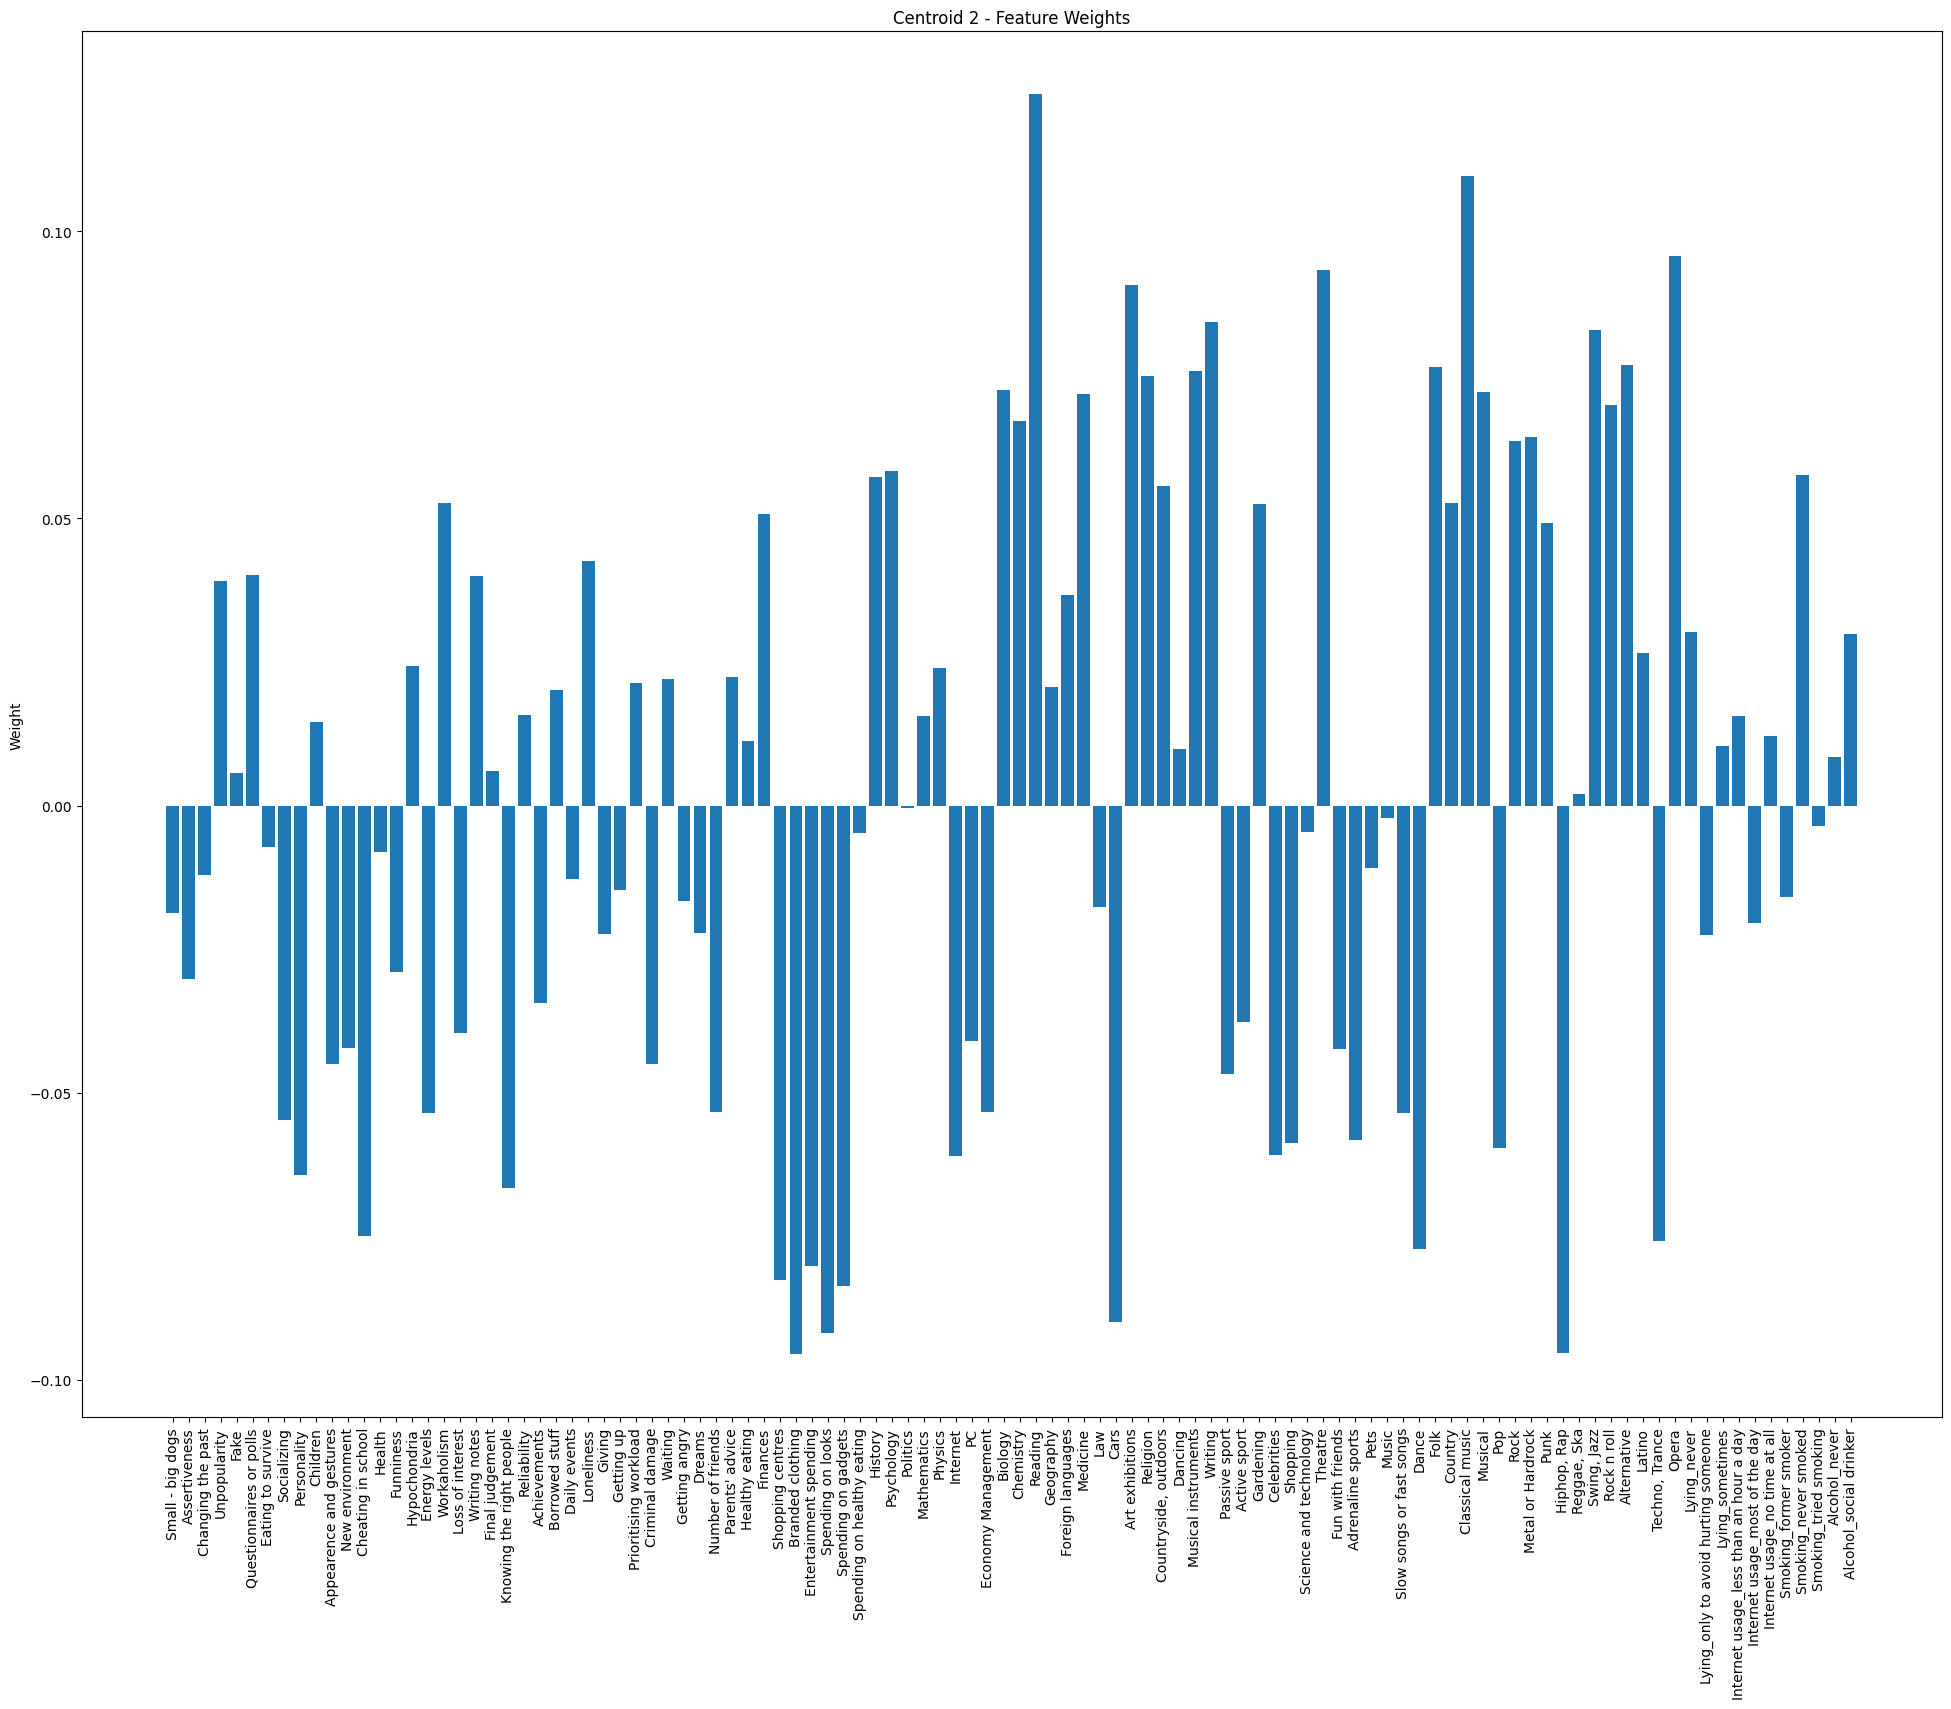

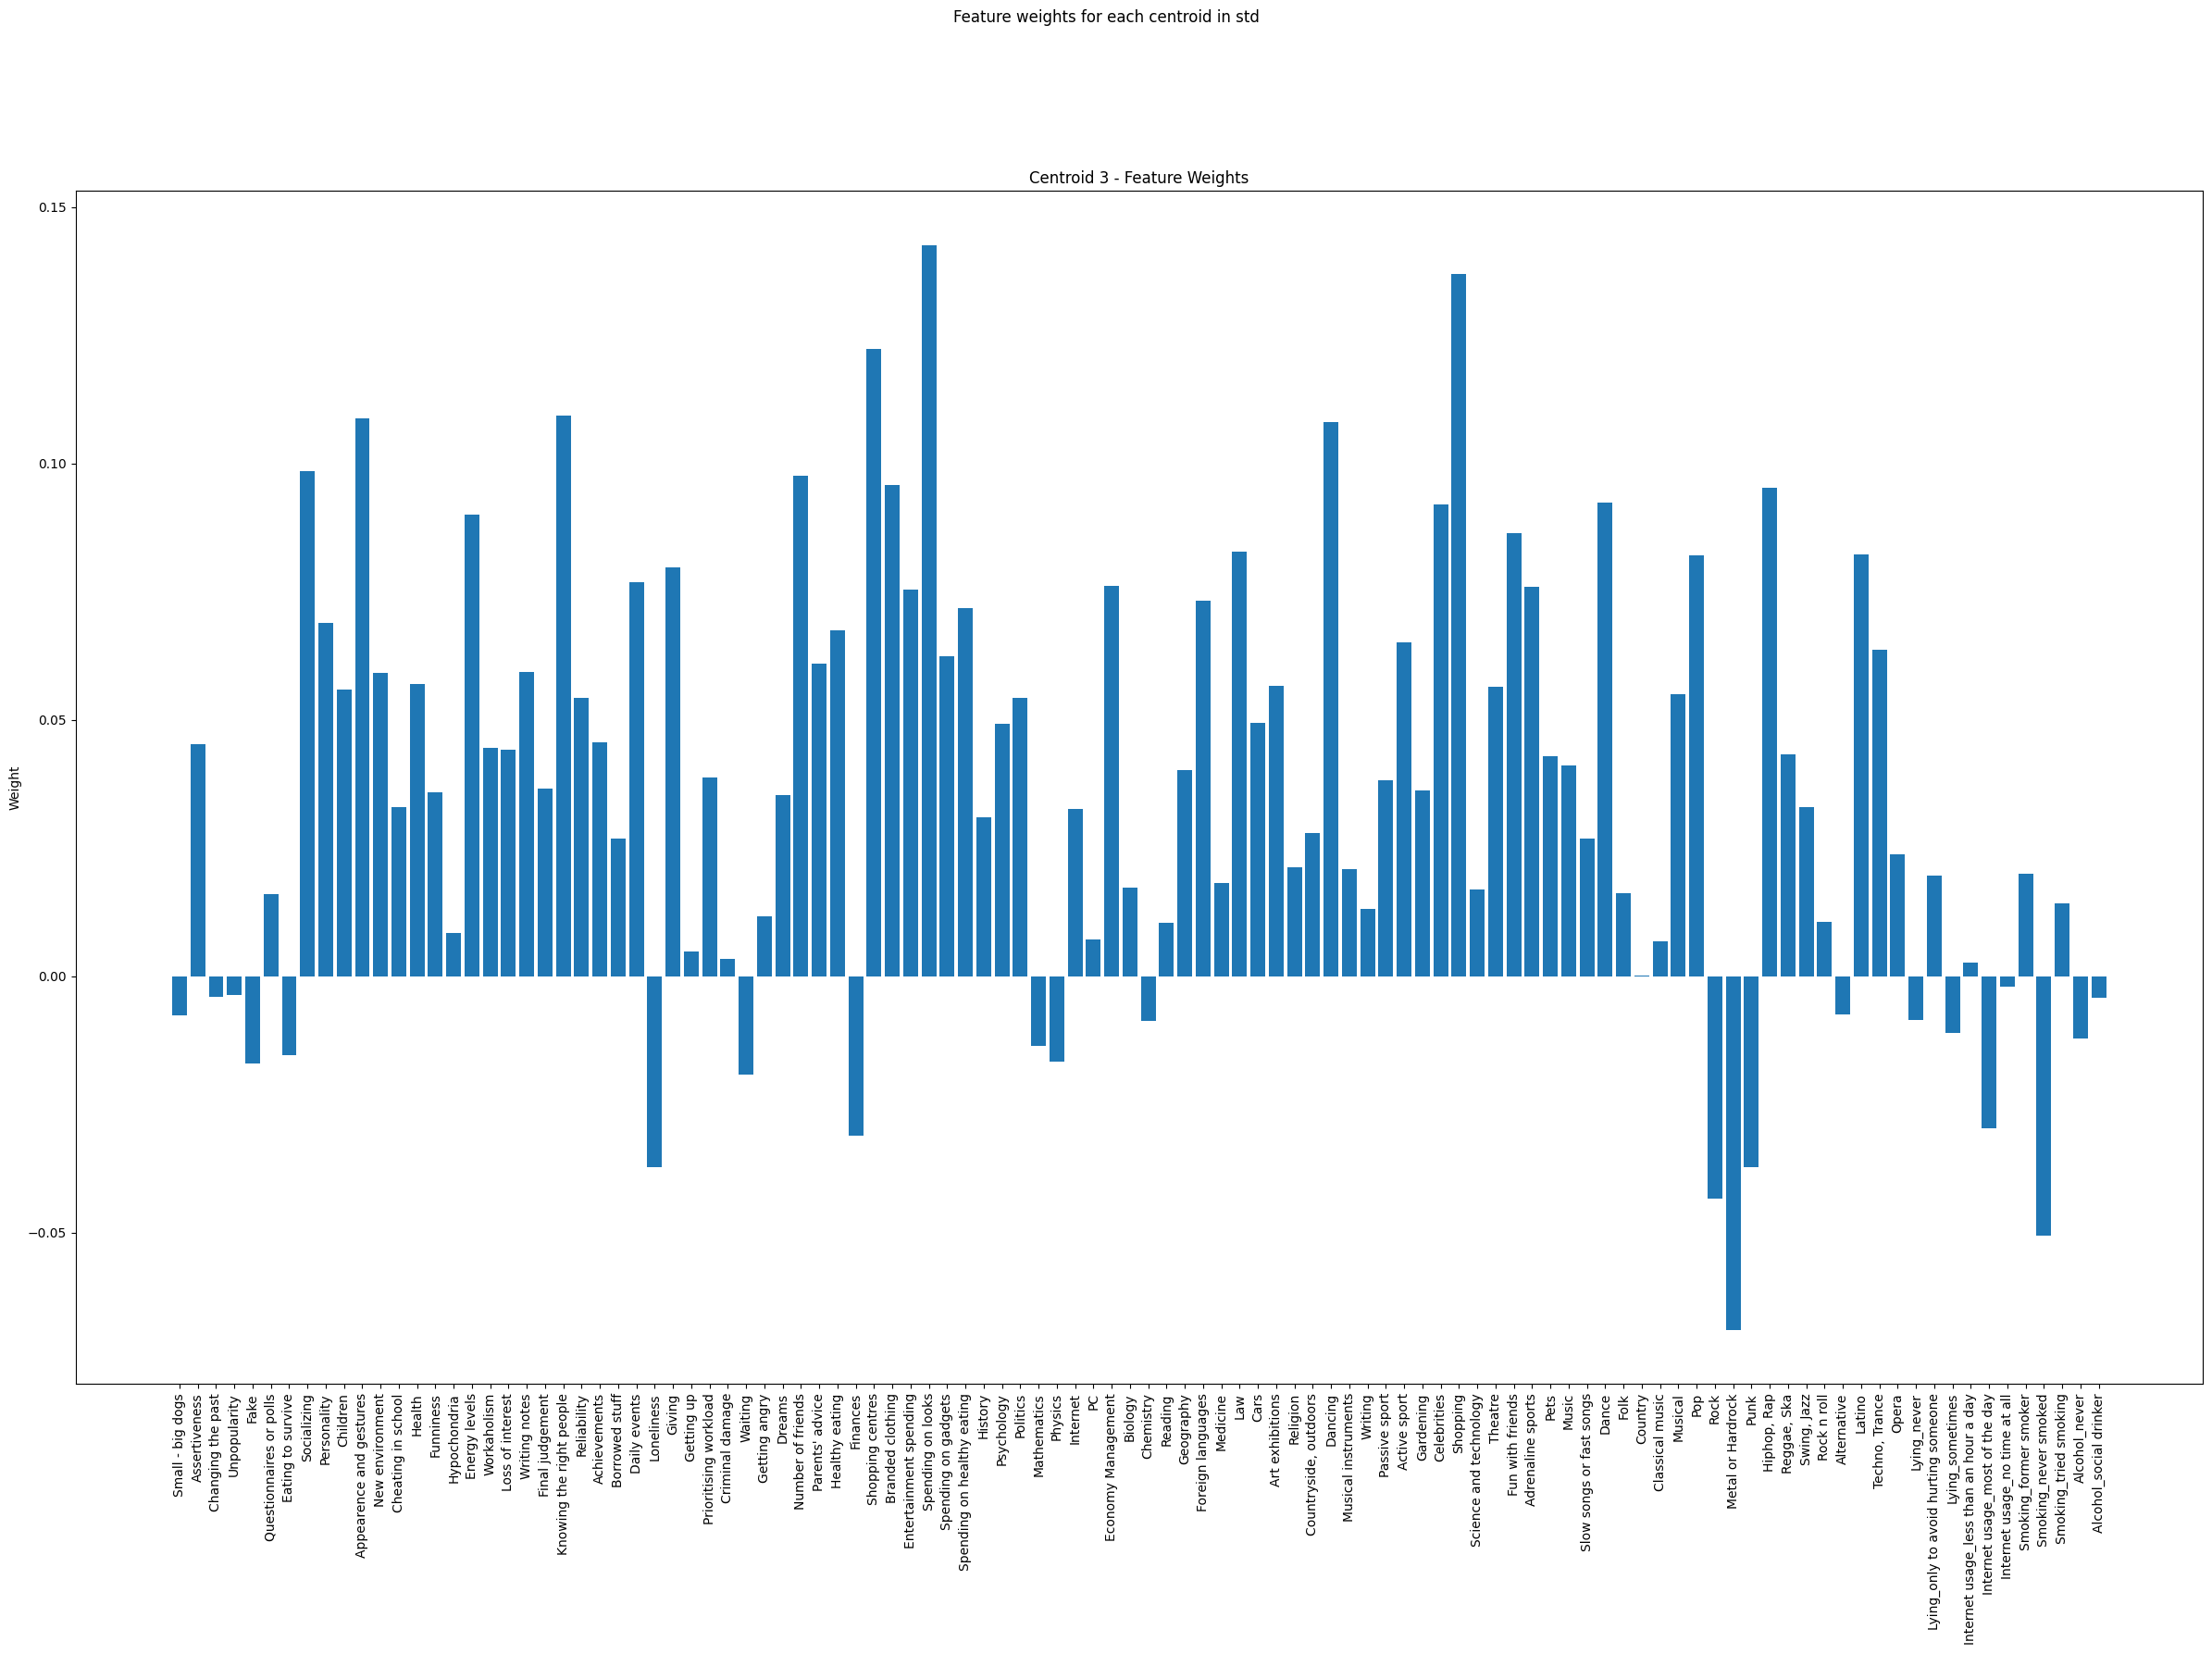


Centroid 1:
Positively related features:
    Music: 0.9006267138955106
    Rock: 0.7994102048712045
    Internet: 0.7401860331297079
    Fun with friends: 0.7361953955970358
    Borrowed stuff: 0.7116170870048221
    Alcohol_social drinker: 0.6971664218323638
    Getting up: 0.6574040319273506
    Lying_sometimes: 0.6445312054057664

 Negatively related features:
    Internet usage_no time at all: 0.0015862736864851467
    Lying_never: 0.05158556941920691
    Smoking_former smoker: 0.10607757695862001
    Dancing: 0.10953471323791653
    Internet usage_less than an hour a day: 0.1150625772810962
    Alcohol_never: 0.11679483096620356
    Lying_only to avoid hurting someone: 0.14801415985224087
    Techno, Trance: 0.14904830387944373

Centroid 2:
Positively related features:
    Music: 0.9452616190905502
    Fun with friends: 0.8852389130431596
    Countryside, outdoors: 0.8364925902578619
    Borrowed stuff: 0.8126765971246434
    Rock: 0.8093358460801569
    Internet: 0.7967876611559

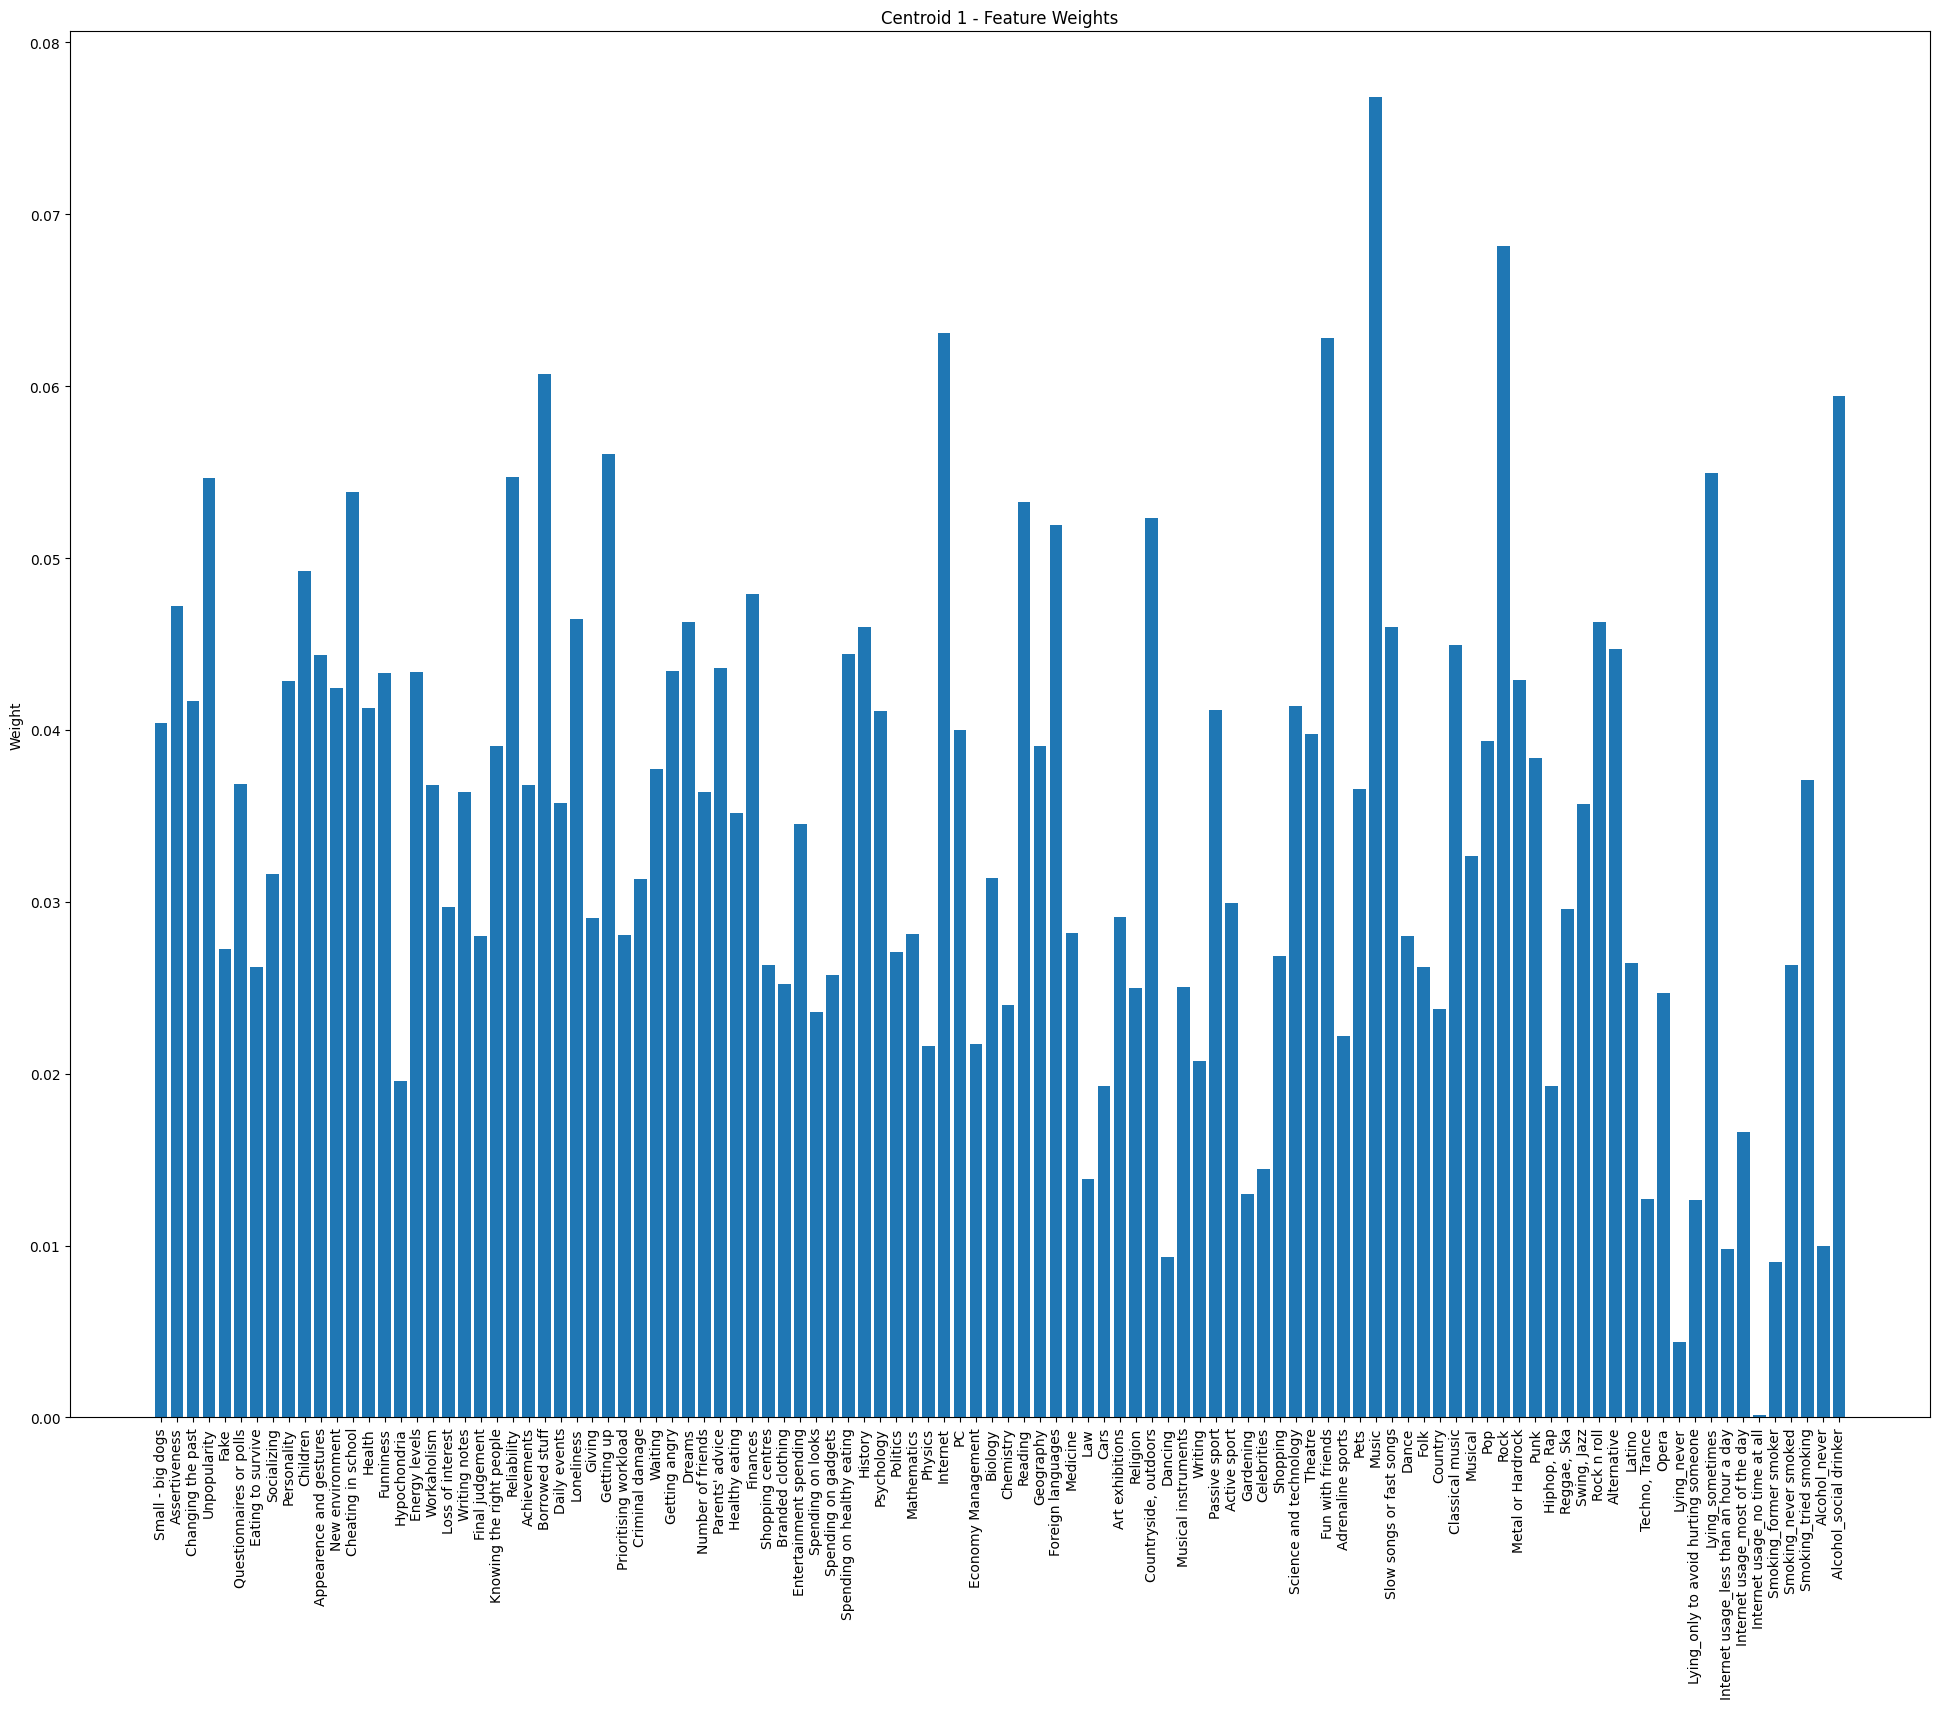

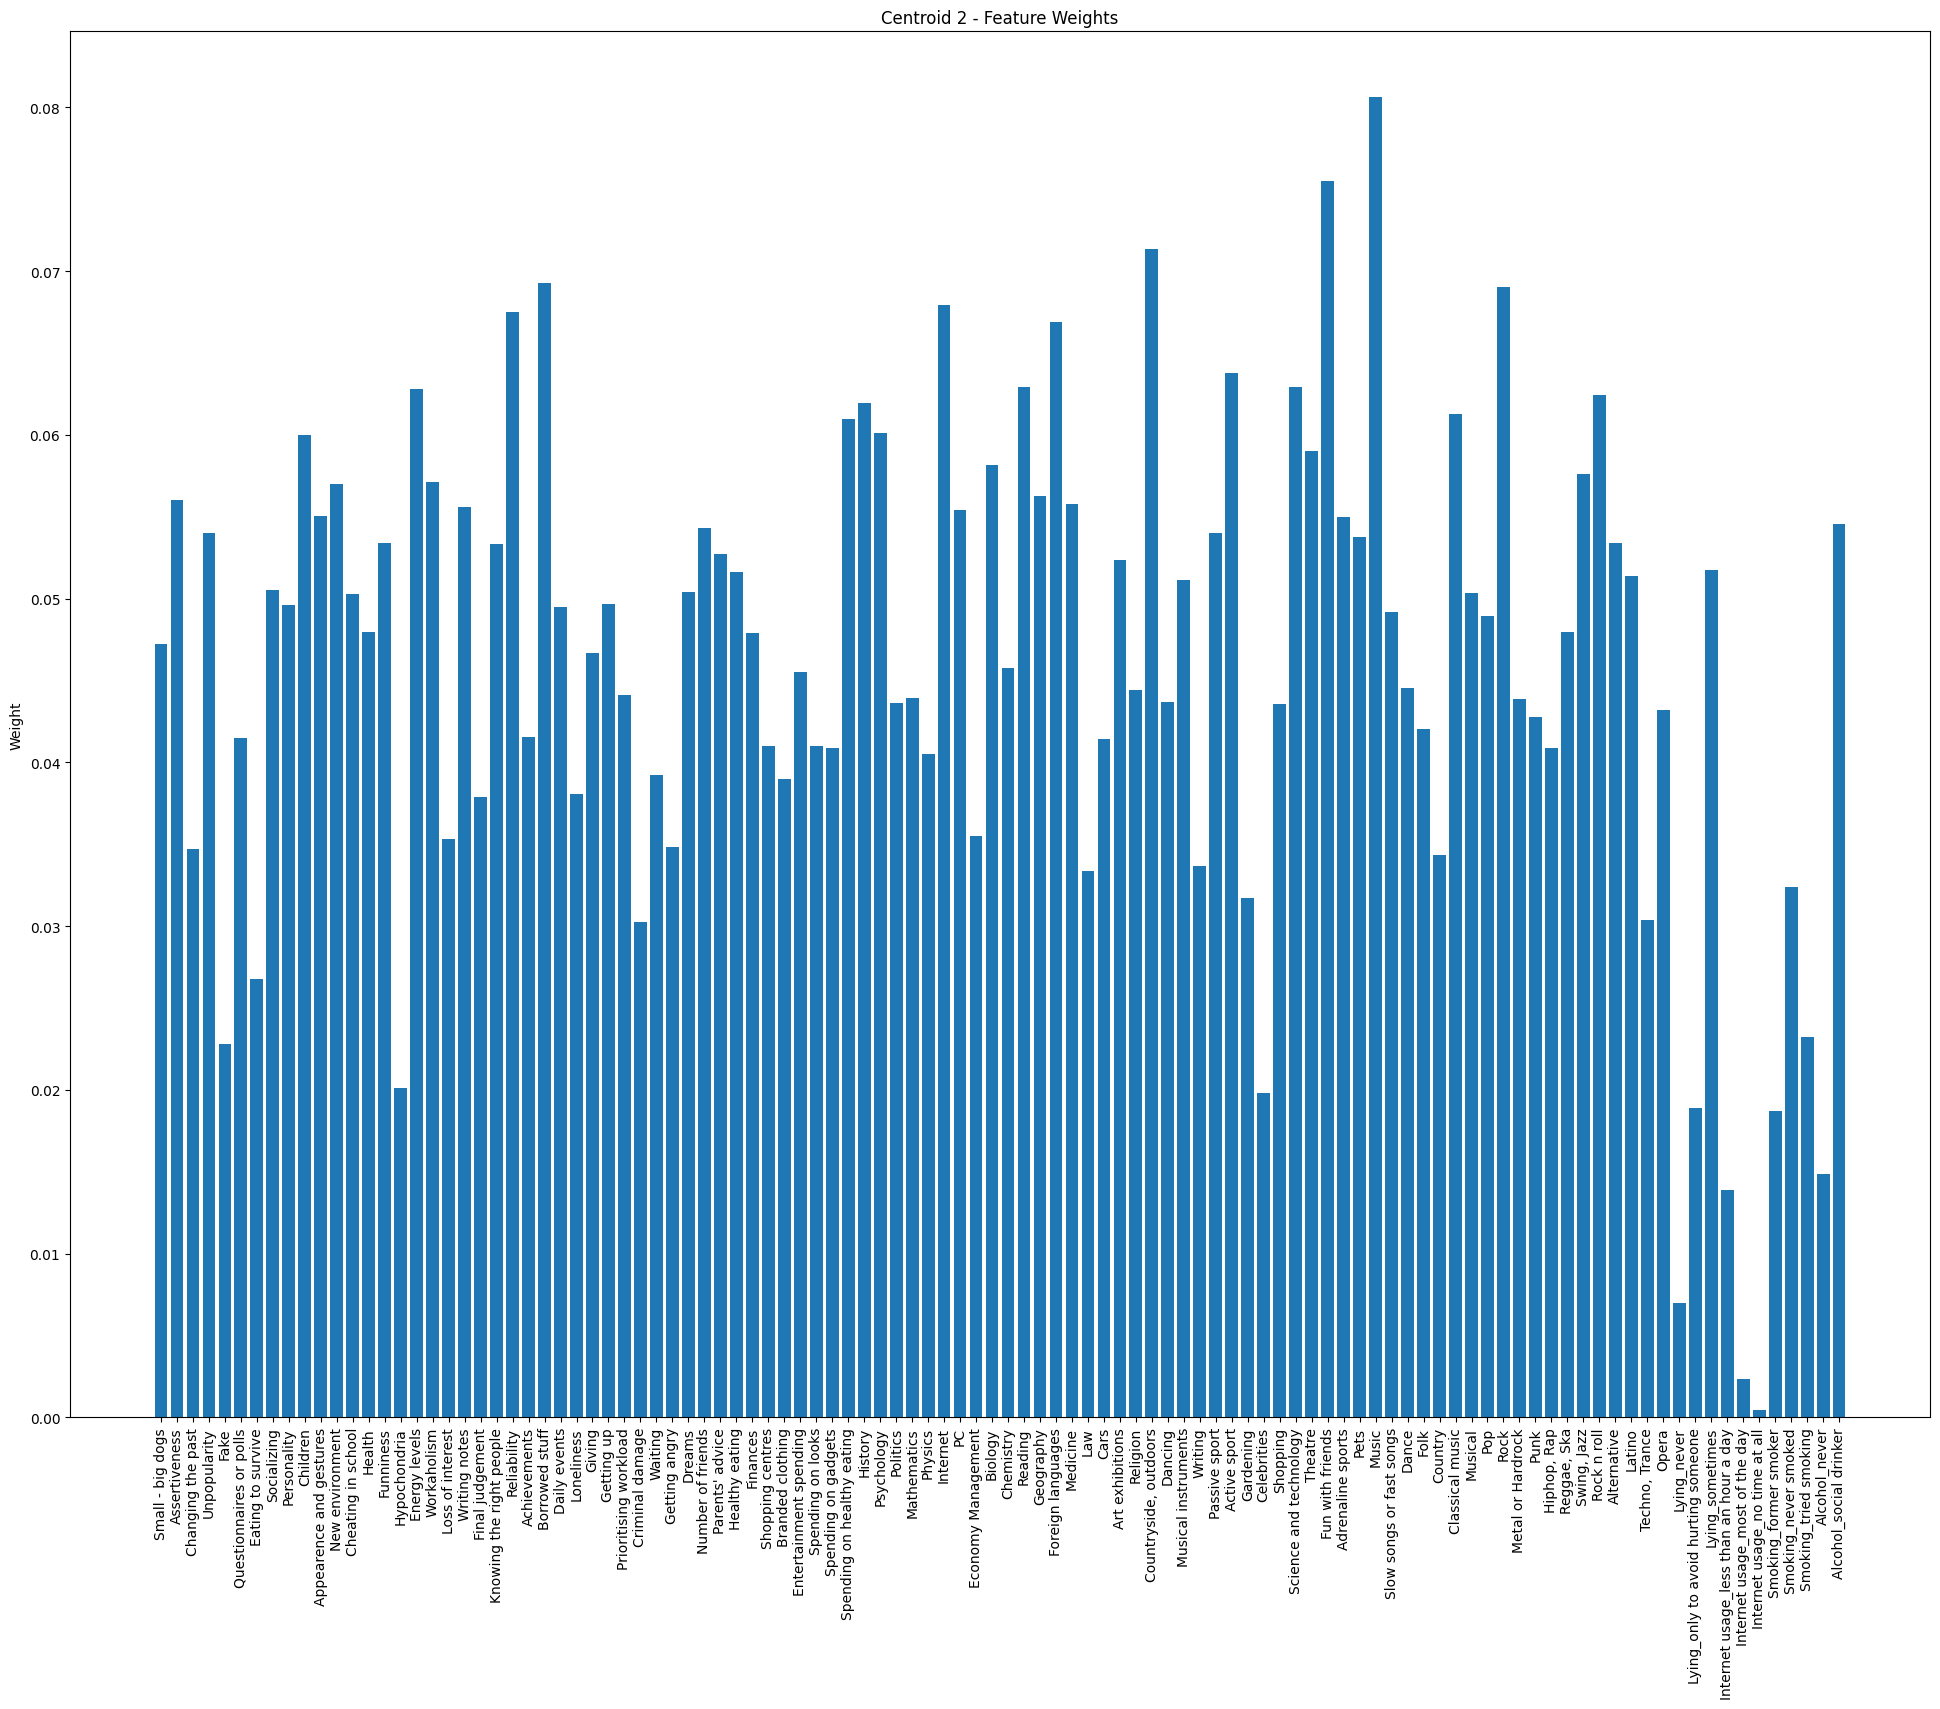

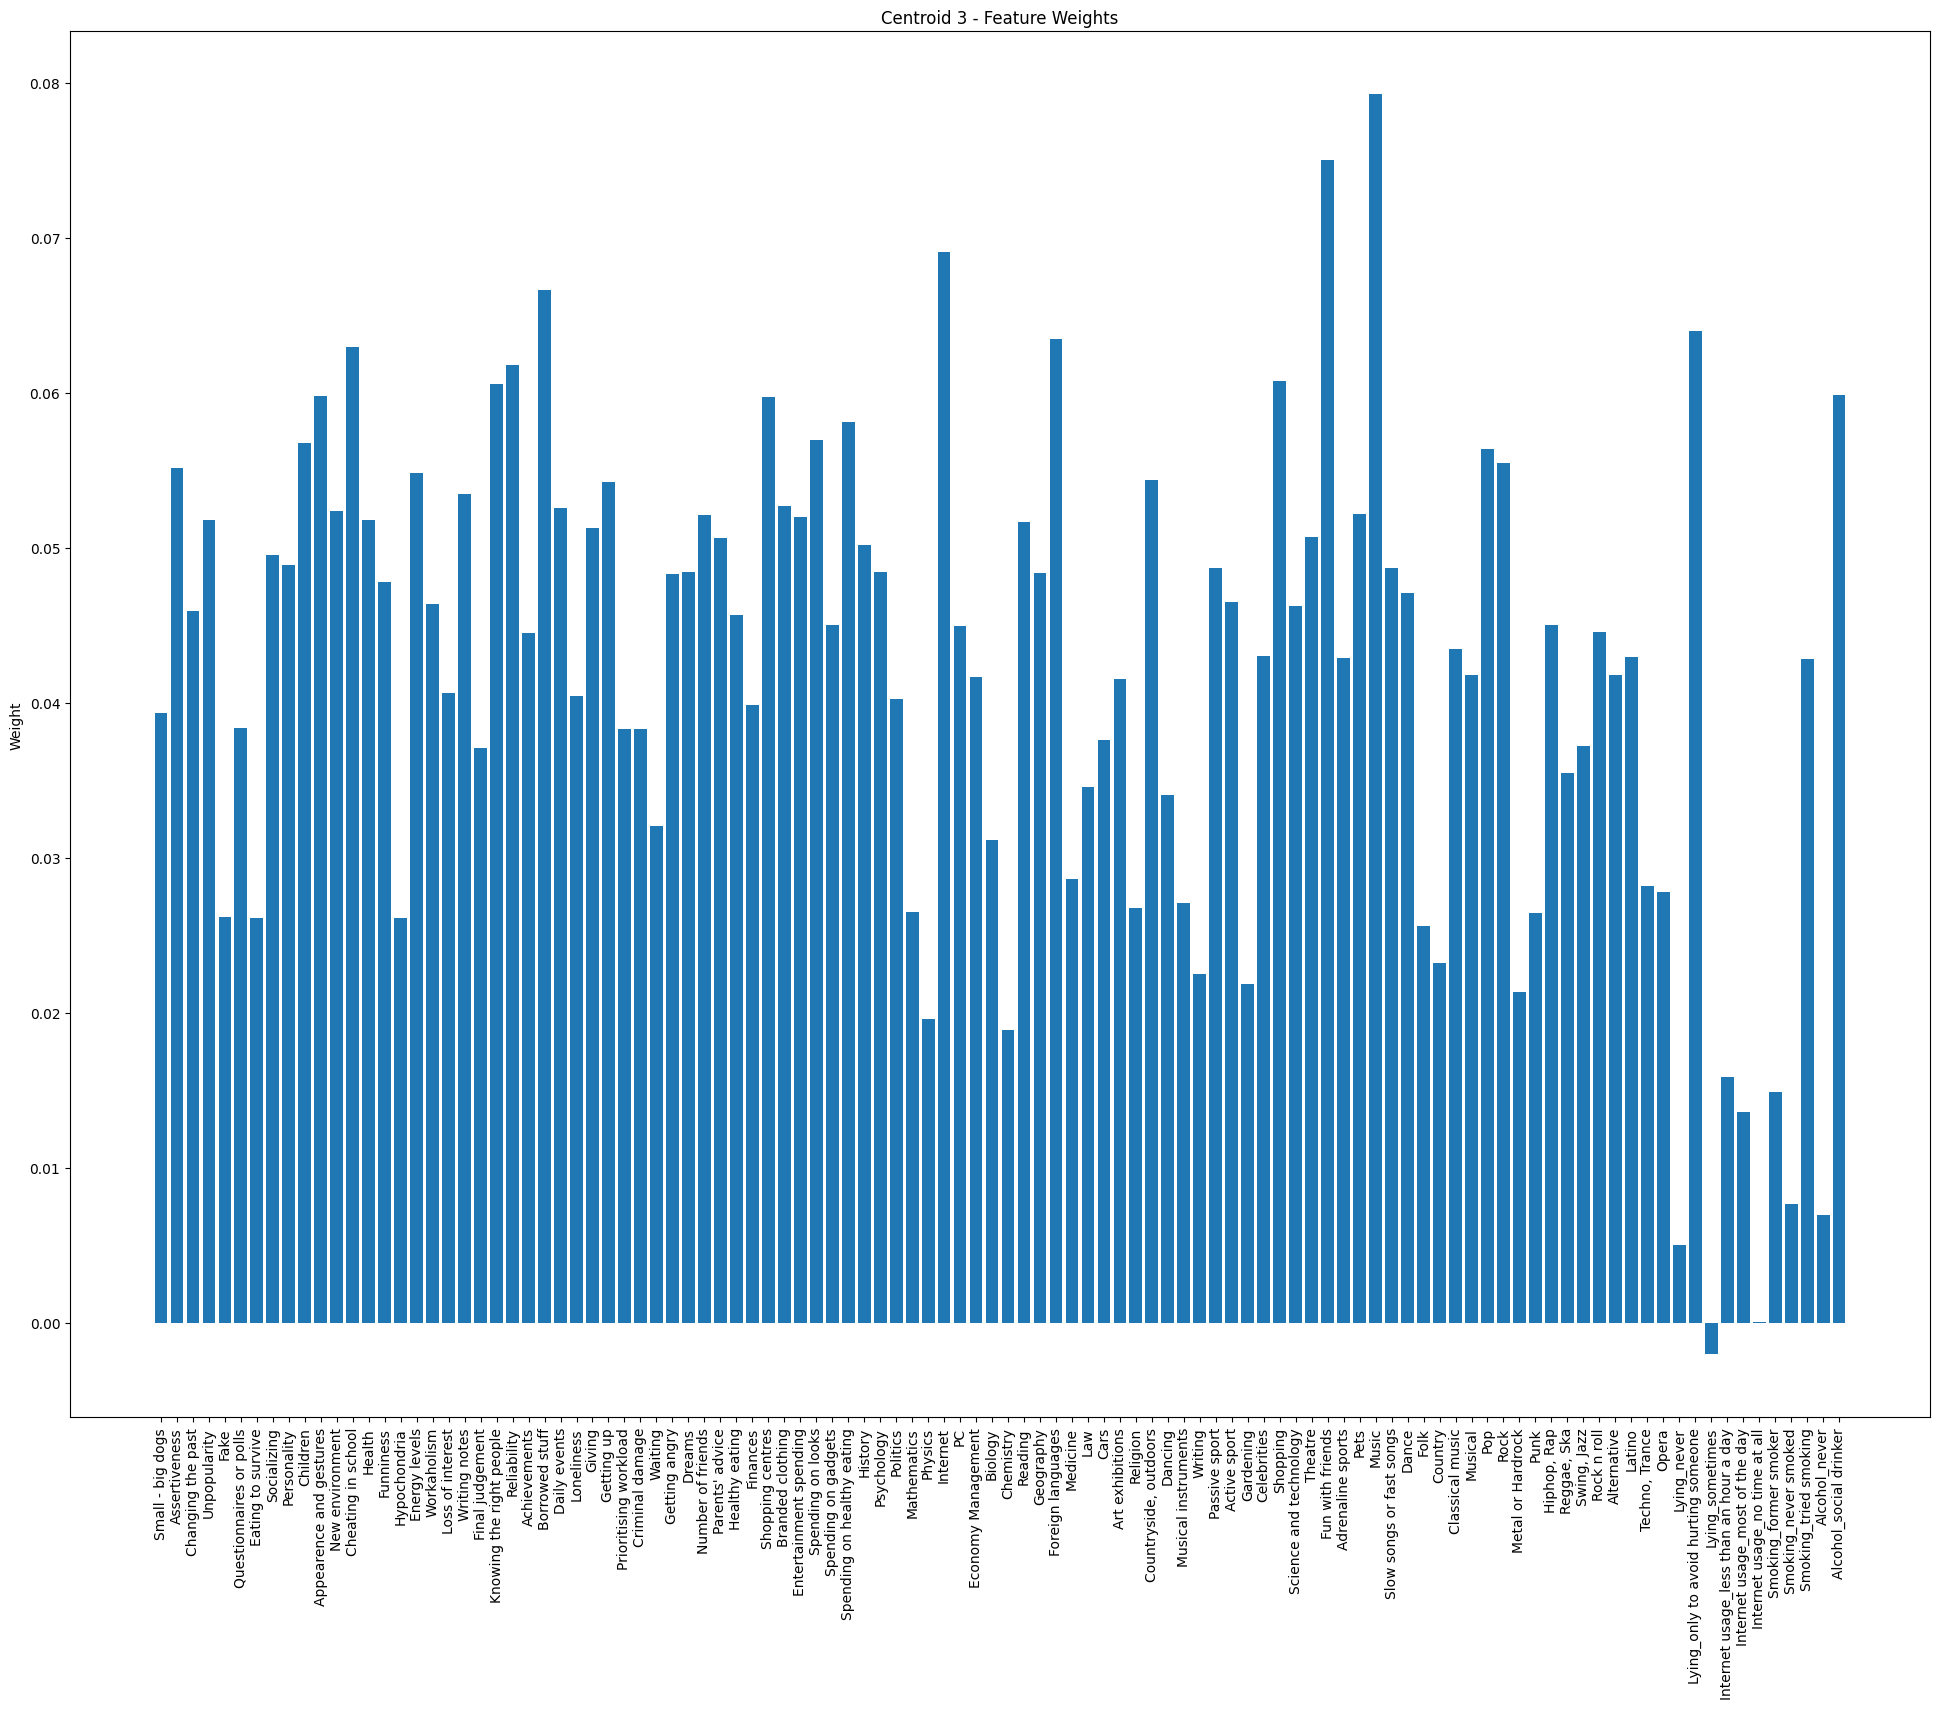

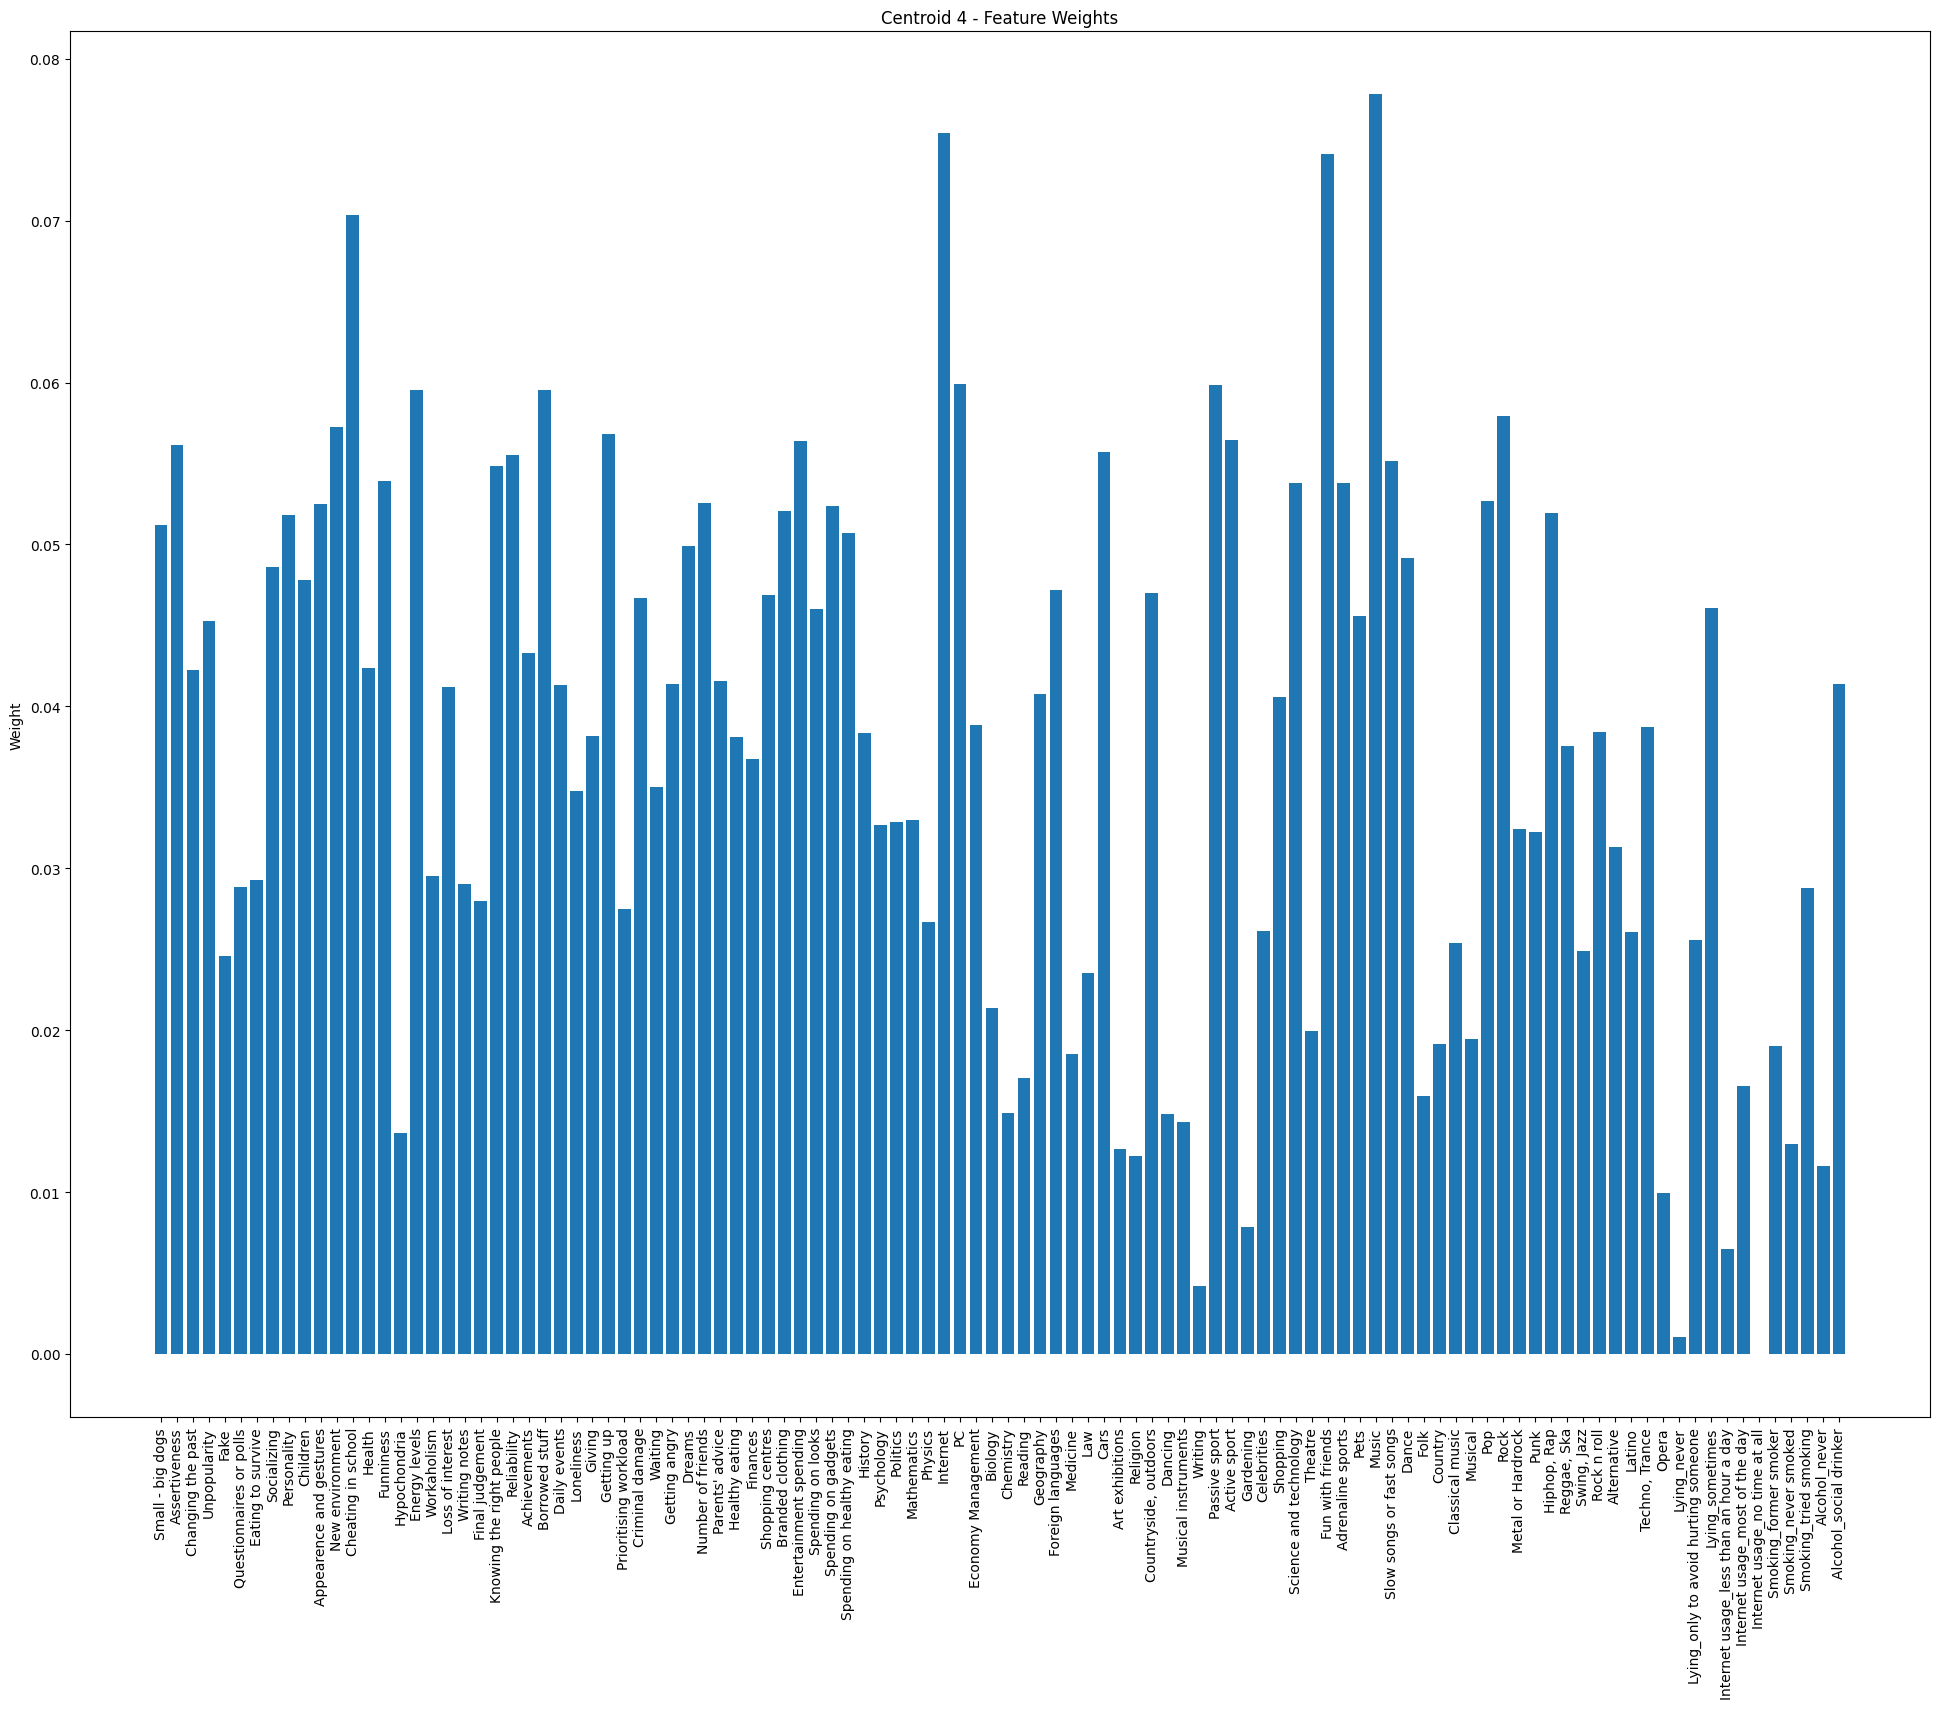

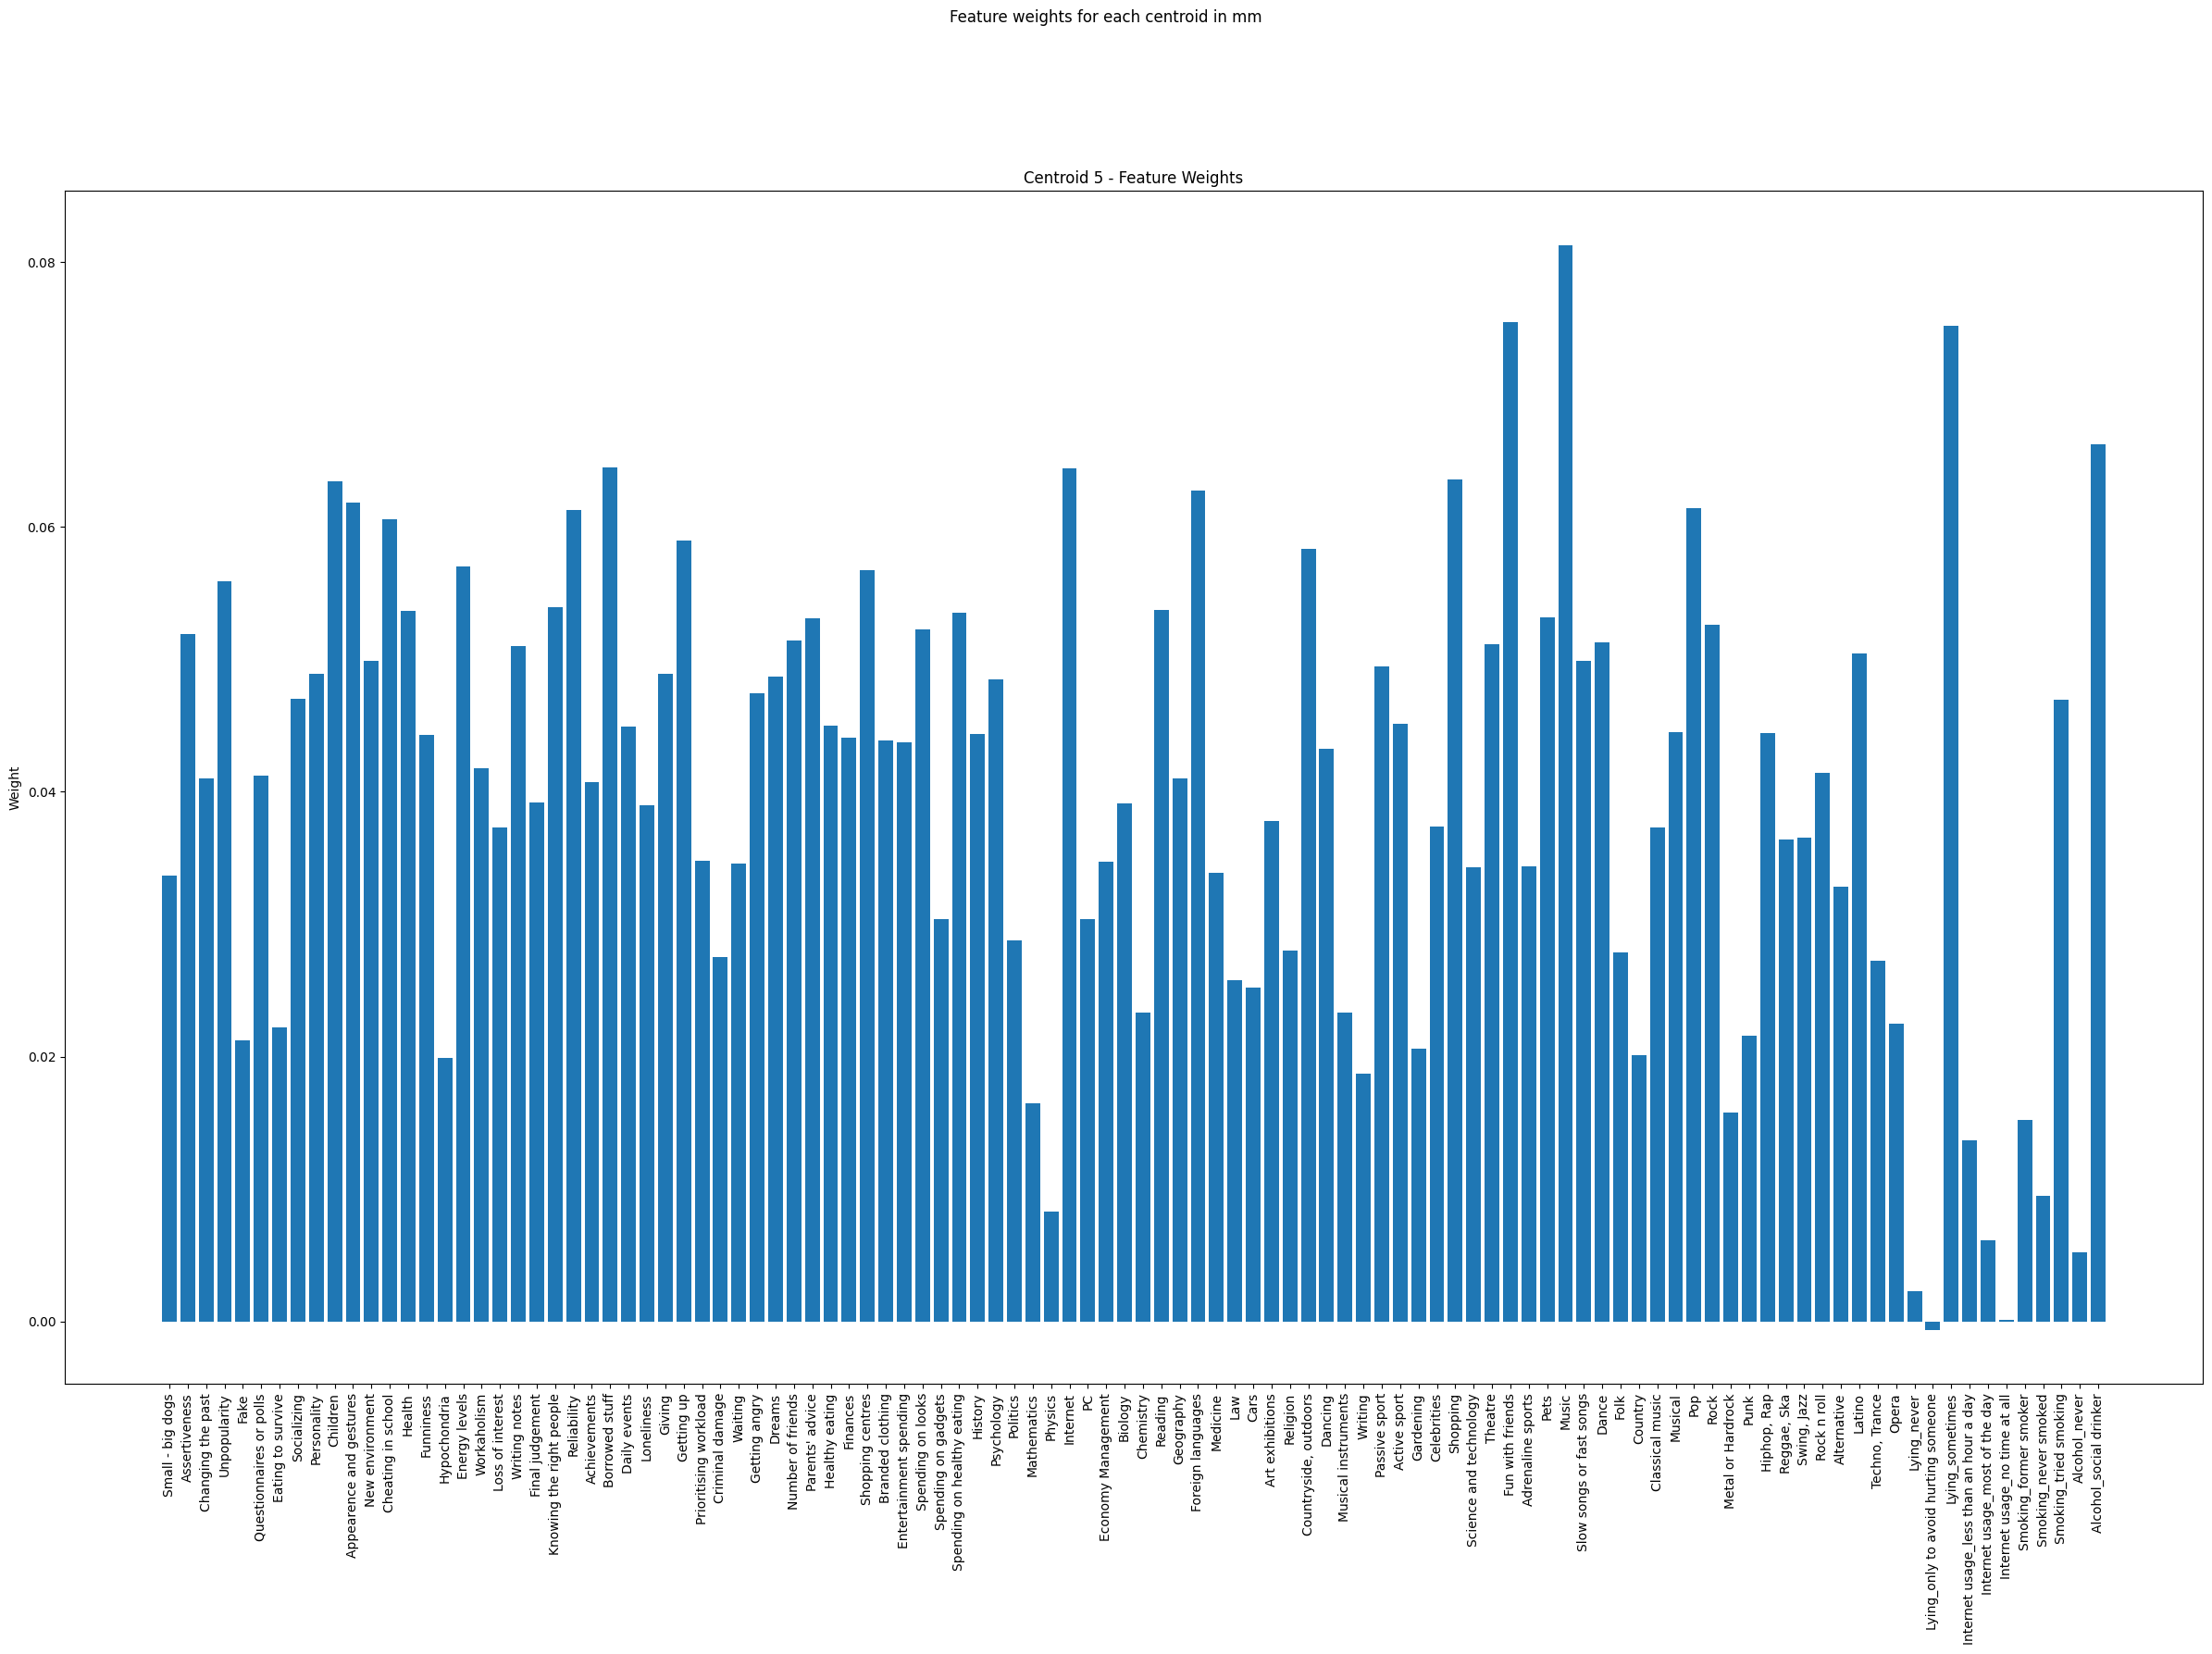

In [ ]:
def project_centroids(kmeans, pca_result, pca, original_df, title):
    centroids = kmeans.cluster_centers_
    projected_centroids = pca.inverse_transform(centroids)
    centroid_df = pd.DataFrame(projected_centroids, columns=original_df.columns)

    for i, centroid in centroid_df.iterrows():
      print(f"\nCentroid {i + 1}:")
      top_features = centroid.nlargest(8)
      print("Positively related features:")
      for feature, value in top_features.items():
        print(f"    {feature}: {value}")

      bottom_features = centroid.nsmallest(8)
      print("\n Negatively related features:")
      for feature, value in bottom_features.items():
        print(f"    {feature}: {value}")


    for i in range(centroids.shape[0]):
        plt.figure(figsize=(24, 18))

        centroid = centroids[i]
        feature_weights = projected_centroids[i] / np.linalg.norm(projected_centroids)
        plt.bar(centroid_df.columns, feature_weights)
        plt.xticks(rotation=90)
        plt.title(f"Centroid {i + 1} - Feature Weights")
        plt.ylabel("Weight")


    plt.suptitle(f"Feature weights for each centroid in {title}", y=1.02)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

project_centroids(kmeans_std, pca_result_std, reduced_pca_std, Xstd_df, 'std')

project_centroids(kmeans_mm, pca_result_mm, reduced_pca_mm, Xmm_df,'mm')


Standardized Data:

Clustering Structure:
The clusters are relatively distinct in the 3D PCA space (PC1, PC2, PC3).
Clusters overlap slightly, which is reflected in the low silhouette score.
Centroid Distribution:
Centroids represent the average location of each cluster in the PCA-reduced space.
PC1 contributes the most variance, influencing the cluster separation.

Silhouette Score:
The silhouette score is low, indicating that the clusters are not well-separated or compact.


MinMax Scaled Data:

Clustering Structure:
The clusters are more dispersed and less distinct than in the standardized data.
There is significant overlap between clusters in the 3D PCA space.
Centroid Distribution:
Centroids are spread out more evenly due to the larger number of clusters.
PC1 still contributes significantly to cluster separation, but its dominance is less pronounced compared to standardized data.

Silhouette Score:
The silhouette score is slightly higher than for standardized data, but it still indicates poor separation and compactness of clusters.


## Exercise 5. Cluster Evaluations

In the cells below, do the following operations:
1. For each one of the two datasets (_std_ and _mm_), perform an **external evaluation** of the clustering obtained at exercise 4.1 with respect to one or more labels in the list _labels_. **Comment the results, comparing the evaluation with the interpretation you gave at exercise 4.3**.
2. For each one of the two datasets (_std_ and _mm_), perform an **internal evaluation** of each cluster, with respect to the silohuette score. **Comment the results**.  



### Explaining the code for Excercise 5:  

We have written the code, however, it is obvious that the _labels_ list, just include the labels from _Demographic_ labels, because of the code line below:  
 _labels = variables_by_type['Demographics']_

 However, the columns of Xdf_ does not include these labels. we know this from the definition of function _which_featgroups_ which does not add any labels from _Demographic_ list.  
 Finally we can conclude that we can't do much about this problem, because there is no columns from _labels_ lis in Xdf_ dataset.

In [ ]:
# Function to evaluate clusters using external and internal metrics
def evaluate_clusters(df, title, labels):
    # Dimensionality reduction using PCA (limit to a maximum of 5 components)
    pca = PCA(n_components=min(df.shape[1], 5))
    pca_result = pca.fit_transform(df)

    # Determine the best number of clusters (k) using silhouette scores
    silhouette_scores = []
    for k in range(3, 11):
        kmeans = KMeans(n_clusters=k, random_state=random_seed)
        cluster_labels = kmeans.fit_predict(pca_result)
        silhouette_avg = silhouette_score(pca_result, cluster_labels)
        silhouette_scores.append(silhouette_avg)

    # Select the best k
    best_k = np.argmax(silhouette_scores) + 3
    print(f"Optimal number of clusters (k) for {title}: {best_k}")

    # Fit k-Means with the optimal k
    kmeans = KMeans(n_clusters=best_k, random_state=random_seed)
    cluster_labels = kmeans.fit_predict(pca_result)

    # External Evaluation: Comparing clusters to given labels
    print(f"\nExternal Evaluation for {title}:")
    for label in labels:
        if label in Xdf_.columns:  # Check if the label exists in the original dataframe
            true_labels = Xdf_[label]
            ari = adjusted_rand_score(true_labels, cluster_labels)
            nmi = normalized_mutual_info_score(true_labels, cluster_labels)
            print(f"  Label '{label}':")
            print(f"    Adjusted Rand Index (ARI): {ari:.3f}")
            print(f"    Normalized Mutual Information (NMI): {nmi:.3f}")
        else:
            print(f"  Label '{label}' not found in the dataset.")

    # Internal Evaluation: Silhouette Score for the best clustering
    silhouette_avg = silhouette_score(pca_result, cluster_labels)
    print(f"\nInternal Evaluation for {title}:")
    print(f"  Silhouette Score: {silhouette_avg:.3f}")

# Evaluate clustering for standardized data
evaluate_clusters(Xstd_df, "Standardized Data", labels)

# Evaluate clustering for MinMax scaled data
evaluate_clusters(Xmm_df, "MinMax Scaled Data", labels)


Optimal number of clusters (k) for Standardized Data: 3

External Evaluation for Standardized Data:
  Label 'Age' not found in the dataset.
  Label 'Height' not found in the dataset.
  Label 'Weight' not found in the dataset.
  Label 'Number of siblings' not found in the dataset.
  Label 'Gender' not found in the dataset.
  Label 'Hand' not found in the dataset.
  Label 'Education' not found in the dataset.
  Label 'Only child' not found in the dataset.
  Label 'Home Town Type' not found in the dataset.
  Label 'Home Type' not found in the dataset.

Internal Evaluation for Standardized Data:
  Silhouette Score: 0.158
Optimal number of clusters (k) for MinMax Scaled Data: 5

External Evaluation for MinMax Scaled Data:
  Label 'Age' not found in the dataset.
  Label 'Height' not found in the dataset.
  Label 'Weight' not found in the dataset.
  Label 'Number of siblings' not found in the dataset.
  Label 'Gender' not found in the dataset.
  Label 'Hand' not found in the dataset.
  Label 

In [ ]:
#external evaluation is not possible because labels are not present in dataframe